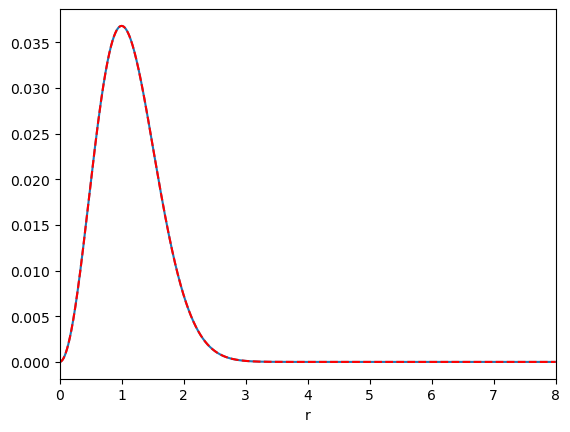

In [241]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

N = 50                                                   # Truncation ordem

L0 = 2                                             # Map parameter 

col = np.cos(np.arange(2*N + 3)*math.pi /(2*N + 2))      # collocation points (Verificado)
                               
colr = col[1:N+2]                                                         # physical domain (Verificado)             

r1 = L0 * colr/(np.sqrt(1-colr**2)) 
r = np.flip(r1)                                           # physical domain (Verificado)  

#out_r = open('r_30_L02.txt', 'a')
#out_r.write(' ' +' '.join(str('%.18f'%n) for n in r)+'\n')
#out_r.close()


# Base Matrix (Tchebyshev Polinomials): 

SB = np.zeros([N+2,N+1])
rSB = np.zeros([N+2,N+1])
rrSB = np.zeros([N+2,N+1])


for i in range(N+1+1):                                    # SB[:,0] = function in origin
  SB[i,] = np.sin((2*i+1)*np.arctan(L0/r))                                                  

for i in range(N+1+1):
  rSB[i,] = -np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**2*(1+L0**2/r**2)) 

for i in range(N+1+1):
  rrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/r))*(2*i+1)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0**3/(r**5*(1+L0**2/r**2)**2)                     

# Base function



psi = SB[0:N+1,:]        # origin included in psi[:,0]
rpsi = rSB[0:N+1,:]
rrpsi = rrSB[0:N+1,:]



# Initial conditions of Phi (Scalar field)                                    

r0 = 0

sigma = 1

# L0 = 1 and sigma = 1/2 and Phi_init = A0*r**2*(np.exp(-(r-r0)**2/sigma**2) + np.exp(-(r+r0)**2/sigma**2))   

A0 =  0.05  #  0.7602785  -> disperse ;  # 0.77 -> colapse 

# L0 = 3 and sigma = 1/2 and Phi_init = A0*(np.exp(-(r-r0)**2/sigma**2) + np.exp(-(r+r0)**2/sigma**2))   

#A0 =  0.75981136951800  #  0.759811369518  -> disperse ;  # 0.759811369518001   -> colapse 

Phi_init = A0*r**2*(np.exp(-(r-r0)**2/sigma**2) + np.exp(-(r+r0)**2/sigma**2))          # Phi initial data out of origin (Verificado)

inv_psi = np.linalg.inv(psi)
  
a0 = np.dot(Phi_init, inv_psi)  # coeficients a(0)  (Verificado)

#out_a = open('a0_30_L02.txt', 'a')
#out_a.write(' ' +' '.join(str('%.18f'%n) for n in a0)+'\n')
#out_a.close()


Phi = np.dot(a0, psi)        # approximative solution in t = 0
rPhi= np.dot(a0, rpsi)

########################### Plot: Initial Conditions of Phi

M = 3000       # plot truncation

rplot = np.linspace(0.00000000000000001,8,M)

colplot = rplot/np.sqrt(L0**2 + rplot**2)

SBplot = np.zeros([N+1,M])
rSBplot = np.zeros([N+1,M])
rrSBplot = np.zeros([N+1,M])

for i in range(N+1):
  SBplot[i,] = np.sin((2*i+1)*np.arctan(L0/rplot))

for i in range(N+1):
  rSBplot[i,] = -np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**2*(1+L0**2/rplot**2)) 

for i in range(N+1):
  rrSBplot[i,] = -np.sin((2*i+1)*np.arctan(L0/rplot))*(2*i+1)**2*L0**2/(rplot**4*(1+L0**2/rplot**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**3*(1+L0**2/rplot**2))-2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0**3/(rplot**5*(1+L0**2/rplot**2)**2)                     

psiplot = SBplot[0:(N+1),:] 
rpsiplot = rSBplot[0:(N+1),:]
rrpsiplot = rrSBplot[0:(N+1),:]

Phiplot_init = A0*rplot**2*(np.exp(-(rplot-r0)**2/sigma**2)+np.exp(-(rplot+r0)**2/sigma**2))     

#Phiplot_init = np.hstack((0, Phiplot_int))

Phiplot = np.dot(a0, psiplot)

plt.plot(rplot, Phiplot, rplot, Phiplot_init, "--r")   #(Verificado)
plt.xlabel('r')
plt.xlim(0,8)
plt.show()


In [242]:
r

array([1.22464680e-16, 6.16193420e-02, 1.23355778e-01, 1.85327292e-01,
       2.47653670e-01, 3.10457427e-01, 3.73864794e-01, 4.38006760e-01,
       5.03020191e-01, 5.69049062e-01, 6.36245803e-01, 7.04772808e-01,
       7.74804128e-01, 8.46527392e-01, 9.20146004e-01, 9.95881668e-01,
       1.07397732e+00, 1.15470054e+00, 1.23834757e+00, 1.32524806e+00,
       1.41577069e+00, 1.51032989e+00, 1.60939401e+00, 1.71349510e+00,
       1.82324091e+00, 1.93932967e+00, 2.06256835e+00, 2.19389549e+00,
       2.33440995e+00, 2.48540753e+00, 2.64842802e+00, 2.82531630e+00,
       3.01830285e+00, 3.23011091e+00, 3.46410162e+00, 3.72447344e+00,
       4.01654145e+00, 4.34713620e+00, 4.72518673e+00, 5.16259511e+00,
       5.67558787e+00, 6.28687841e+00, 7.02927088e+00, 7.95196708e+00,
       9.13227915e+00, 1.06990550e+01, 1.28842142e+01, 1.61515878e+01,
       2.15834373e+01, 3.24265314e+01, 6.49146822e+01])

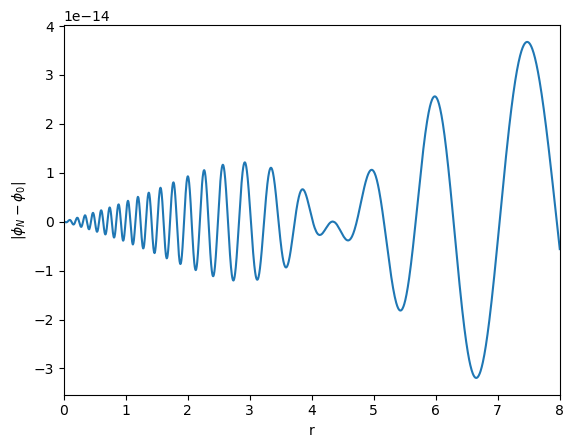

In [243]:
erro = Phiplot_init - Phiplot

plt.plot(rplot, erro)
plt.xlabel('r')
plt.xlim(0,8)
plt.ylabel("$|\phi_N - \phi_0|$")
plt.show()

In [244]:
Pi_0 = np.zeros(N+1)
b0 = np.dot(Pi_0, psi)
Pi = np.dot(b0, psi)

c0 = np.zeros([N+1])     # guess value
for i in range(N+1):
  c0[i] = 0.0001

coeforigin = 1/L0**2*(-(-1)**(np.arange(N+1))*(2*np.arange(1,N+2)-1)**2)    # 1/r * d\phi/dr

tol = 1e-19
#cnew = 0 
#err = abs(c0 - cnew)

n = 0
nf = 100

# Newton Raphson loop
#while max(err) >= tol:
while n <= nf:
  rChi = np.dot(c0 ,rpsi)
  rrChi = np.dot(c0, rrpsi)
  H0_0 = 4*rrChi[0] + 8*np.dot(coeforigin,c0) + 1/2*(rPhi[0])**2
  H0_int = 4*rChi[1:N+1]**2 + 4*rrChi[1:N+1] + 8/r[1:N+1]*rChi[1:N+1] + 1/2*rPhi[1:N+1]**2
  H0 = np.hstack((H0_0, H0_int))
  J1 = rChi*rpsi
  JH_0 = 8*J1[:,0]+ 4*rrpsi[:,0] + 8*coeforigin
  JH_int = 8*J1[:,1:N+1] + 4*rrpsi[:,1:N+1] + 8/r[1:N+1]*rpsi[:,1:N+1]  
  JH = np.column_stack((JH_0, JH_int))
  inv_JH = np.linalg.inv(JH)
  cnew = c0
  c0 = c0 - np.dot(H0, inv_JH)
  err = abs(c0 - cnew)
  print(max(err))
  if  max(err) <= tol:
    print(c0)
    break
  n = n + 1


0.00018072204514129676
1.4191173292375174e-05
3.177652016300367e-11
5.421010862427522e-20
[ 2.94913250e-04 -2.40729157e-05 -7.34785563e-06 -6.23355905e-07
  3.91343317e-06 -2.19226601e-07 -2.41042358e-06  1.64827233e-06
 -1.34615556e-07 -3.08424515e-07  8.27314600e-08  5.55823967e-08
 -2.00516038e-08 -1.21184321e-08  3.79898893e-09  3.08362817e-09
 -4.73648184e-10 -8.01019204e-10 -4.14759870e-11  1.87438729e-10
  5.81241758e-11 -3.08898119e-11 -2.38258806e-11  7.89738707e-13
  6.96246661e-12  2.62141492e-12 -6.56186190e-13 -7.84687504e-13
  3.51518186e-14  3.95615133e-13  3.04331637e-13  1.43560988e-13
  8.00887846e-14  8.40786509e-14  9.43125663e-14  8.91948038e-14
  7.53606242e-14  6.23769855e-14  5.32402975e-14  4.66151063e-14
  4.07891550e-14  3.51222210e-14  2.97234765e-14  2.47959846e-14
  2.03951372e-14  1.64427522e-14  1.28521282e-14  9.55900258e-15
  6.53289328e-15  3.74534724e-15  1.18331779e-15]


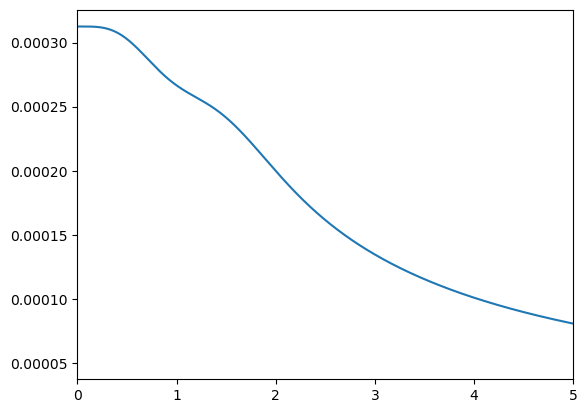

In [245]:

Chiplot = np.dot(c0, psiplot)

rrChiplot = np.dot(c0, rrpsiplot)

plt.plot(rplot,Chiplot)
plt.xlim(0,5)
plt.show()
     

In [246]:
# Equation for Krr: momentum constraint

# Initial values of Krr: Base functions of Krr

# In r = 0: 

SB1 = 1/2*(SB[1:(N+1),:] + SB[0:(N),:])          # VERIFICADO
rSB1 = 1/2*(rSB[1:(N+1),:] + rSB[0:(N),:])
rrSB1 = 1/2*(rrSB[1:(N+1),:] + rrSB[0:(N),:])

# Base functions for Beta

SB2 = np.zeros([N,N+1])      
rSB2 = np.zeros([N,N+1])
rrSB2 = np.zeros([N,N+1])



for i in range(N):                                                   # VERIFICADO
  SB2[i,] = np.sin((2*(i+1/2)+1)*np.arctan(L0/r))                                                  


for i in range(N):
  rSB2[i,] = -np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**2*(1+L0**2/r**2))


for i in range(N):
  rrSB2[i,] = -np.sin((2*i+2)*np.arctan(L0/r))*(2*i+2)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0**3/(r**5*(1+L0**2/r**2)**2)






In [247]:
np.shape(SB2)

(50, 51)

In [248]:
np.shape(SB1)

(50, 51)

In [249]:
Nq = int(3/2*N)           # Quadrature truncation

gauss_quadrature = np.polynomial.legendre.leggauss(Nq + 1) 

new_col = gauss_quadrature[0]            # Legendre quadrature points


# Legendre Polinomials

P = np.zeros([Nq+3,Nq+1])
colP = np.zeros([Nq+3,Nq+1])

P[0,] = 1
P[1,] = new_col

colP[0,] = 0
colP[1,] = 1

for i in range(2,Nq+3):
  P[i,] = ((2*i-1)*new_col*P[i-1,] - (i-1)*P[i-2,])/(i)   

for i in range(2,Nq+3):
  colP[i,] = i*P[i-1] + new_col*colP[i-1]

P_max = P[Nq+1]

colP_max = colP[Nq+1]

wq_col = 2/((1-new_col**2)*colP_max**2)    # Legendre weight (Verificado)

rq = L0*(1+new_col)/(1-new_col)            # Physical quadrature domain

qSB = np.zeros([Nq+1,Nq+1])
qrSB = np.zeros([Nq+1,Nq+1])
qrrSB = np.zeros([Nq+1,Nq+1])


for i in range(Nq+1):
  qSB[i,] = np.sin((2*i+1)*np.arctan(L0/rq))                                                  

for i in range(Nq+1):
  qrSB[i,] = -np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**2*+L0**2)

for i in range(Nq+1):
  qrrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/rq))*(2*i+1)**2*L0**2/(rq**4*(1+L0**2/rq**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**3*(1+L0**2/rq**2))-2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0**3/(rq**5*(1+L0**2/rq**2)**2)                     

qpsi = qSB[0:N+1,:]
rqpsi = qrSB[0:N+1,:]
rrqpsi = qrrSB[0:N+1,:]


qSB1 = 1/2*(qSB[1:(N+1),:] + qSB[0:(N),:])          # VERIFICADO
rqSB1 = 1/2*(qrSB[1:(N+1),:] + qrSB[0:(N),:])
rrqSB1 = 1/2*(qSB[1:(N+1),:] + qrrSB[0:(N),:])



# Initial Phi in quadrature points

#qPhi = np.dot(a0, qpsi)      
#rqPhi= np.dot(a0, rqpsi)

# Initial Pi for quadrature points

#qPi = np.dot(b0, qpsi) 


# Initial Chi for quadrature points:

#qChi = np.dot(c0, qpsi)   # Verificado todos
#rqChi = np.dot(c0, rqpsi)
#rrqChi = np.dot(c0, rrqpsi)

# Initial values of Krr:

#qKrr = np.dot(ck0, qSB1) 

# Alpha na origem

#Alphacenter = (-1)**(np.arange(N+1))


In [250]:
# Filtering

Nc = 0

Nf = N - Nc

coef_f = 36
s = 30

filter1 = np.ones(N+1)
#filter1 = np.exp(- coef_f*((np.arange(N - Nc + 1))/(N-Nc))**s)

In [251]:
np.dot(np.arange(1, 2*N + 2, 2), c0)

0.0002019968570401053

In [252]:
# Runge Kutta 4th order

h = 0.0002   # step size
tf = 7

It = int(tf/h)

#t1 = np.linspace(0, tf, It) 

t = 0

Madm = []
Alpha_origin = []
phi_origin = []
L2HC = []
phi_set = []

out_a = open('Alpha_origin.txt', 'a')
out_a.truncate(0)                        # arase the old datas and start the new ones

out_p = open('phi_origin.txt', 'a')
out_p.truncate(0)

V = 0

M0 = 2*np.dot(np.arange(1, 2*N + 2, 2), c0) # Madm(t = 0)


#matriz = np.concatenate((array1, array2))

while t <= tf:
   
  # First step
  Phi = np.dot(a0, psi)      
  rPhi = np.dot(a0, rpsi)
  rrPhi = np.dot(a0, rrpsi)      
  Pi = np.dot(b0, psi) 
  rPi= np.dot(b0, rpsi)
  Chi = np.dot(c0, psi) 
  rChi = np.dot(c0, rpsi)
  rrChi = np.dot(c0, rrpsi)   
  Matrix_Krr = 2*rChi[1:N+1]*SB1[:,1:N+1] + rSB1[:,1:N+1] + 3/r[1:N+1]*SB1[:,1:N+1]   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi[1:N+1]*rPhi[1:N+1]*np.exp(4*Chi[1:N+1]) # (p,)
  ck0 = np.dot(rhsk, inv_matrix_krr)  # (p,)
  Krr = np.dot(ck0, SB1)              # (p+1,)     
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha_0 = rrpsi[:,0] + 2*coeforigin - np.exp(4*Chi[0])*Pi[0]**2*psi[:,0]
  Matrix_Alpha_int = rrpsi[:,1:N+1] + 2*(1/r[1:N+1] + rChi[1:N+1])*rpsi[:,1:N+1] - 3/2*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]**2*psi[:,1:N+1] - np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 - V)*psi[:,1:N+1] 
  Matrix_Alpha = np.column_stack((Matrix_Alpha_0, Matrix_Alpha_int))
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2[:,1:N+1] - SB2[:,1:N+1]/r[1:N+1]
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha[1:N+1]*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*(2*Alpha[1:N+1]/r[1:N+1] + rAlpha[1:N+1] + 2*rChi[1:N+1]*Alpha[1:N+1])*rPhi[1:N+1] + np.exp(-4*Chi[1:N+1])*Alpha[1:N+1]*rrPhi[1:N+1] - Alpha[1:N+1]* V
  db = np.dot(np.hstack((db_origin, db_int)), inv_psi)
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K1 = h*(dc)
  L1 = h*(da)
  N1 = h*(db)
  
  # L2-error associated to the Hamiltonian constraint
  qPhi = np.dot(a0, qpsi)      
  rqPhi= np.dot(a0, rqpsi)
  qPi = np.dot(b0, qpsi) 
  qChi = np.dot(c0, qpsi)
  rqChi = np.dot(c0, rqpsi)
  rrqChi = np.dot(c0, rrqpsi) 
  qKrr = np.dot(ck0, qSB1)
  H = 4*rqChi**2 + 4*rrqChi + 8*rqChi/rq + 3/4*np.exp(-4*qChi)*qKrr**2 + np.exp(4*qChi)*(1/2*qPi**2 + np.exp(-4*qChi)/2*rqPhi**2)   # Hamiltonian constraint (HC)
  L2HC.append((1/2*np.dot(H**2,wq_col))**1/2)    # L2 error of HC 
  
  # Alpha origin
  Alpha_0 = 1 + np.dot(al0, psi[:,0])
  Alpha_origin.append(Alpha_0)                   # = Alphacenter in matlab
  out_a.write(str(t) + " " + str(Alpha_0))
  out_a.write(',\n')
  
  # Phi origin:  
  phi_0 = np.dot(a0, psi[:,0])
  phi_origin.append(phi_0)
  out_p.write(str(t) + " " + str(phi_0))
  out_p.write(',\n')
  
  # ADM mass:
  Madm.append(2*np.dot(np.arange(1, 2*N + 2, 2), c0))

  # Second step
  Phi = np.dot(a0 + L1/2, psi)     
  rPhi= np.dot(a0 + L1/2 , rpsi)
  rrPhi = np.dot(a0 + L1/2, rrpsi) 
  Pi = np.dot(b0 + N1/2, psi)
  rPi= np.dot(b0 + N1/2, rpsi)
  Chi = np.dot(c0 + K1/2, psi)
  rChi = np.dot(c0 + K1/2, rpsi)
  rrChi = np.dot(c0 + K1/2, rrpsi)
  Matrix_Krr = 2*rChi[1:N+1]*SB1[:,1:N+1] + rSB1[:,1:N+1] + 3/r[1:N+1]*SB1[:,1:N+1]   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi[1:N+1]*rPhi[1:N+1]*np.exp(4*Chi[1:N+1]) # (p,)
  ck0 = np.dot(rhsk, inv_matrix_krr)  # (p,)
  Krr = np.dot(ck0, SB1)              # (p+1,)     
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha_0 = rrpsi[:,0] + 2*coeforigin - np.exp(4*Chi[0])*Pi[0]**2*psi[:,0]
  Matrix_Alpha_int = rrpsi[:,1:N+1] + 2*(1/r[1:N+1] + rChi[1:N+1])*rpsi[:,1:N+1] - 3/2*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]**2*psi[:,1:N+1] - np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 - V)*psi[:,1:N+1] 
  Matrix_Alpha = np.column_stack((Matrix_Alpha_0, Matrix_Alpha_int))
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2[:,1:N+1] - SB2[:,1:N+1]/r[1:N+1]
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha[1:N+1]*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*(2*Alpha[1:N+1]/r[1:N+1] + rAlpha[1:N+1] + 2*rChi[1:N+1]*Alpha[1:N+1])*rPhi[1:N+1] + np.exp(-4*Chi[1:N+1])*Alpha[1:N+1]*rrPhi[1:N+1] - Alpha[1:N+1]* V
  db = np.dot(np.hstack((db_origin, db_int)), inv_psi)
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K2 = h*(dc)
  L2 = h*(da)
  N2 = h*(db)

  # Third step
  Phi = np.dot(a0 + L2/2, psi)     
  rPhi = np.dot(a0 + L2/2 , rpsi)
  rrPhi = np.dot(a0 + L2/2, rrpsi) 
  Pi = np.dot(b0 + N2/2, psi)
  rPi= np.dot(b0 + N2/2, rpsi)
  Chi = np.dot(c0 + K2/2, psi)
  rChi = np.dot(c0 + K2/2, rpsi)
  rrChi = np.dot(c0 + K2/2, rrpsi)
  Matrix_Krr = 2*rChi[1:N+1]*SB1[:,1:N+1] + rSB1[:,1:N+1] + 3/r[1:N+1]*SB1[:,1:N+1]   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi[1:N+1]*rPhi[1:N+1]*np.exp(4*Chi[1:N+1]) # (p,)
  ck0 = np.dot(rhsk, inv_matrix_krr)  # (p,)
  Krr = np.dot(ck0, SB1)              # (p+1,)     
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha_0 = rrpsi[:,0] + 2*coeforigin - np.exp(4*Chi[0])*Pi[0]**2*psi[:,0]
  Matrix_Alpha_int = rrpsi[:,1:N+1] + 2*(1/r[1:N+1] + rChi[1:N+1])*rpsi[:,1:N+1] - 3/2*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]**2*psi[:,1:N+1] - np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 - V)*psi[:,1:N+1] 
  Matrix_Alpha = np.column_stack((Matrix_Alpha_0, Matrix_Alpha_int))
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2[:,1:N+1] - SB2[:,1:N+1]/r[1:N+1]
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha[1:N+1]*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*(2*Alpha[1:N+1]/r[1:N+1] + rAlpha[1:N+1] + 2*rChi[1:N+1]*Alpha[1:N+1])*rPhi[1:N+1] + np.exp(-4*Chi[1:N+1])*Alpha[1:N+1]*rrPhi[1:N+1] - Alpha[1:N+1]* V
  db = np.dot(np.hstack((db_origin, db_int)), inv_psi)
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K3 = h*(dc)
  L3 = h*(da)
  N3 = h*(db) 

  # Forth step
  Phi = np.dot(a0 + L3, psi)     
  rPhi= np.dot(a0 + L3 , rpsi)
  rrPhi = np.dot(a0 + L3, rrpsi) 
  Pi = np.dot(b0 + N3, psi)
  rPi= np.dot(b0 + N3, rpsi)
  Chi = np.dot(c0 + K3, psi)
  rChi = np.dot(c0 + K3, rpsi)
  rrChi = np.dot(c0 + K3, rrpsi)
  Matrix_Krr = 2*rChi[1:N+1]*SB1[:,1:N+1] + rSB1[:,1:N+1] + 3/r[1:N+1]*SB1[:,1:N+1]   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi[1:N+1]*rPhi[1:N+1]*np.exp(4*Chi[1:N+1]) # (p,)
  ck0 = np.dot(rhsk, inv_matrix_krr)  # (p,)
  Krr = np.dot(ck0, SB1)              # (p+1,)     
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha_0 = rrpsi[:,0] + 2*coeforigin - np.exp(4*Chi[0])*Pi[0]**2*psi[:,0]
  Matrix_Alpha_int = rrpsi[:,1:N+1] + 2*(1/r[1:N+1] + rChi[1:N+1])*rpsi[:,1:N+1] - 3/2*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]**2*psi[:,1:N+1] - np.exp(4*Chi[1:N+1])*(Pi[1:N+1]**2 - V)*psi[:,1:N+1] 
  Matrix_Alpha = np.column_stack((Matrix_Alpha_0, Matrix_Alpha_int))
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2[:,1:N+1] - SB2[:,1:N+1]/r[1:N+1]
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha[1:N+1]*np.exp(-4*Chi[1:N+1])*Krr[1:N+1]
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db_origin = 2*np.exp(-4*Chi[0])*Alpha[0]*np.dot(a0, coeforigin) + np.exp(-4*Chi[0])*Alpha[0]*rrPhi[0]
  db_int = Beta[1:N+1]*rPi[1:N+1] + np.exp(-4*Chi[1:N+1])*(2*Alpha[1:N+1]/r[1:N+1] + rAlpha[1:N+1] + 2*rChi[1:N+1]*Alpha[1:N+1])*rPhi[1:N+1] + np.exp(-4*Chi[1:N+1])*Alpha[1:N+1]*rrPhi[1:N+1] - Alpha[1:N+1]* V
  db = np.dot(np.hstack((db_origin, db_int)), inv_psi)
  dc = np.dot(Beta*rChi + rBeta/2 - Alpha/2*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K4 = h*(dc)
  L4 = h*(da)
  N4 = h*(db)  
  
  t = t + h
#  print(t) 
#  if t > 9:
#    h=0.0001
 
    
  # Evolution functions
  a0 = a0 + 1/6 * (L1 + 2*L2 + 2*L3 + L4)
  b0 = filter1*(b0 + 1/6 * (N1 + 2*N2 + 2*N3 + N4))
  c0 = c0 + 1/6 * (K1 + 2*K2 + 2*K3 + K4)  
  phi_set.append(np.dot(a0, psiplot))
  
  print('t =',t,'rPi =', max(rPi), sep = '\n') 
    

#  pi_set[i,:] = np.dot(b0, psiplot)
#  chi_set[i,:] = np.dot(c0, psiplot)
  
out_a.close()
out_p.close() 
  
t1 = np.linspace(0, tf, len(Alpha_origin)) 

t =
0.0002
rPi =
6.118285339422868e-05
t =
0.0004
rPi =
0.00012236568960827035
t =
0.0006000000000000001
rPi =
0.00018354847331269582
t =
0.0008
rPi =
0.0002447311690537612
t =
0.001
rPi =
0.0003059137413758643
t =
0.0012000000000000001
rPi =
0.00036709615482157177
t =
0.0014000000000000002
rPi =
0.0004282783739316375
t =
0.0016000000000000003
rPi =
0.0004894603632450316
t =
0.0018000000000000004
rPi =
0.0005506420872989615
t =
0.0020000000000000005
rPi =
0.000611823510628898
t =
0.0022000000000000006
rPi =
0.0006730045977685982
t =
0.0024000000000000007
rPi =
0.0007341853132501312
t =
0.0026000000000000007
rPi =
0.0007953656216039044
t =
0.002800000000000001
rPi =
0.0008565454873586848
t =
0.003000000000000001
rPi =
0.0009177248750416281
t =
0.003200000000000001
rPi =
0.0009789037491783029
t =
0.003400000000000001
rPi =
0.0010400820742927155
t =
0.003600000000000001
rPi =
0.0011012598149073396
t =
0.0038000000000000013
rPi =
0.0011624369355431358
t =
0.004000000000000001
rPi =
0.00122

t =
0.058999999999999754
rPi =
0.017898038444983805
t =
0.05919999999999975
rPi =
0.017957681040015556
t =
0.05939999999999975
rPi =
0.018017313222435934
t =
0.05959999999999975
rPi =
0.01807693495777859
t =
0.05979999999999975
rPi =
0.018136546211585843
t =
0.05999999999999975
rPi =
0.018196146949408798
t =
0.06019999999999975
rPi =
0.018255737136807313
t =
0.060399999999999746
rPi =
0.018315316739349954
t =
0.060599999999999744
rPi =
0.018374885722614132
t =
0.06079999999999974
rPi =
0.018434444052186066
t =
0.06099999999999974
rPi =
0.01849399169366079
t =
0.06119999999999974
rPi =
0.01855352861264224
t =
0.06139999999999974
rPi =
0.018613054774743232
t =
0.06159999999999974
rPi =
0.018672570145585484
t =
0.06179999999999974
rPi =
0.018732074690799697
t =
0.061999999999999736
rPi =
0.018791568376025403
t =
0.062199999999999735
rPi =
0.018851051166911263
t =
0.06239999999999973
rPi =
0.018910523029114855
t =
0.06259999999999974
rPi =
0.018969983928302812
t =
0.06279999999999974
rPi =

t =
0.11440000000000122
rPi =
0.033902532776138236
t =
0.11460000000000123
rPi =
0.03395800759875497
t =
0.11480000000000123
rPi =
0.03401346283966053
t =
0.11500000000000124
rPi =
0.034068898467207065
t =
0.11520000000000125
rPi =
0.03412431444975772
t =
0.11540000000000125
rPi =
0.03417971075568665
t =
0.11560000000000126
rPi =
0.03423508735337895
t =
0.11580000000000126
rPi =
0.034290444211230856
t =
0.11600000000000127
rPi =
0.034345781297649626
t =
0.11620000000000127
rPi =
0.03440109858105343
t =
0.11640000000000128
rPi =
0.034456396029871696
t =
0.11660000000000129
rPi =
0.03451167361254481
t =
0.11680000000000129
rPi =
0.034566931297524306
t =
0.1170000000000013
rPi =
0.03462216905327281
t =
0.1172000000000013
rPi =
0.03467738684826403
t =
0.11740000000000131
rPi =
0.03473258465098284
t =
0.11760000000000131
rPi =
0.03478776242992527
t =
0.11780000000000132
rPi =
0.034842920153598515
t =
0.11800000000000133
rPi =
0.03489805779052093
t =
0.11820000000000133
rPi =
0.0349531753092

t =
0.1728000000000029
rPi =
0.04914287169131828
t =
0.1730000000000029
rPi =
0.04919133582476149
t =
0.1732000000000029
rPi =
0.049239771702462104
t =
0.1734000000000029
rPi =
0.049288179297138024
t =
0.17360000000000292
rPi =
0.04933655858152708
t =
0.17380000000000292
rPi =
0.04938490952838702
t =
0.17400000000000293
rPi =
0.04943323211049568
t =
0.17420000000000294
rPi =
0.04948152630065092
t =
0.17440000000000294
rPi =
0.049529792071670596
t =
0.17460000000000295
rPi =
0.04957802939639265
t =
0.17480000000000295
rPi =
0.049626238247675265
t =
0.17500000000000296
rPi =
0.04967441859839665
t =
0.17520000000000296
rPi =
0.049722570421455226
t =
0.17540000000000297
rPi =
0.04977069368976966
t =
0.17560000000000298
rPi =
0.049818788376278796
t =
0.17580000000000298
rPi =
0.04986685445394173
t =
0.176000000000003
rPi =
0.04991489189573791
t =
0.176200000000003
rPi =
0.04996290067466697
t =
0.176400000000003
rPi =
0.050010880763748974
t =
0.176600000000003
rPi =
0.05005883213602438
t =
0

t =
0.23360000000000464
rPi =
0.062455492462202715
t =
0.23380000000000464
rPi =
0.06249420882734503
t =
0.23400000000000465
rPi =
0.06253288962922766
t =
0.23420000000000465
rPi =
0.06257153484712923
t =
0.23440000000000466
rPi =
0.06261014446034954
t =
0.23460000000000467
rPi =
0.0626487184482104
t =
0.23480000000000467
rPi =
0.06268725679005492
t =
0.23500000000000468
rPi =
0.06272575946524801
t =
0.23520000000000468
rPi =
0.06276422645317604
t =
0.2354000000000047
rPi =
0.06280265773324695
t =
0.2356000000000047
rPi =
0.0628410532848902
t =
0.2358000000000047
rPi =
0.06287941308755716
t =
0.2360000000000047
rPi =
0.0629177371207204
t =
0.2362000000000047
rPi =
0.06295602536387424
t =
0.23640000000000472
rPi =
0.06299427779653484
t =
0.23660000000000472
rPi =
0.06303249439823962
t =
0.23680000000000473
rPi =
0.06307067514854767
t =
0.23700000000000473
rPi =
0.06310882002703987
t =
0.23720000000000474
rPi =
0.0631469290133186
t =
0.23740000000000475
rPi =
0.0631850020870077
t =
0.237

t =
0.28780000000000094
rPi =
0.07158341935394946
t =
0.2880000000000009
rPi =
0.07161181310670525
t =
0.2882000000000009
rPi =
0.07164016651216917
t =
0.2884000000000009
rPi =
0.07166847955605474
t =
0.28860000000000086
rPi =
0.07169675222410296
t =
0.28880000000000083
rPi =
0.07172498450208195
t =
0.2890000000000008
rPi =
0.07175317637578749
t =
0.2892000000000008
rPi =
0.07178132783104244
t =
0.28940000000000077
rPi =
0.07180943885369698
t =
0.28960000000000075
rPi =
0.0718375094296291
t =
0.2898000000000007
rPi =
0.07186553954474378
t =
0.2900000000000007
rPi =
0.07189352918497383
t =
0.2902000000000007
rPi =
0.07192147833627924
t =
0.29040000000000066
rPi =
0.07194938698464785
t =
0.29060000000000064
rPi =
0.07197725511609471
t =
0.2908000000000006
rPi =
0.07200508271666271
t =
0.2910000000000006
rPi =
0.07203286977242217
t =
0.29120000000000057
rPi =
0.07206061626947112
t =
0.29140000000000055
rPi =
0.07208832219393521
t =
0.2916000000000005
rPi =
0.07211598753196775
t =
0.291800

t =
0.3435999999999948
rPi =
0.07789641128672421
t =
0.3437999999999948
rPi =
0.07791309605336001
t =
0.34399999999999475
rPi =
0.07792973759676704
t =
0.34419999999999473
rPi =
0.0779463359106621
t =
0.3443999999999947
rPi =
0.07796289098878986
t =
0.3445999999999947
rPi =
0.07797940282492292
t =
0.34479999999999467
rPi =
0.07799587141286178
t =
0.34499999999999464
rPi =
0.07801229674643459
t =
0.3451999999999946
rPi =
0.07802867881949764
t =
0.3453999999999946
rPi =
0.07804501762593453
t =
0.3455999999999946
rPi =
0.07806131315965714
t =
0.34579999999999456
rPi =
0.07807756541460487
t =
0.34599999999999453
rPi =
0.078093774384745
t =
0.3461999999999945
rPi =
0.07810994006407243
t =
0.3463999999999945
rPi =
0.07812606244660991
t =
0.34659999999999447
rPi =
0.07814214152640779
t =
0.34679999999999445
rPi =
0.07815817729754435
t =
0.3469999999999944
rPi =
0.07817416975412522
t =
0.3471999999999944
rPi =
0.07819011889028413
t =
0.3473999999999944
rPi =
0.07820602470018201
t =
0.347599999

t =
0.40379999999998817
rPi =
0.0822254375064249
t =
0.40399999999998815
rPi =
0.08223548315921003
t =
0.4041999999999881
rPi =
0.08224548989319269
t =
0.4043999999999881
rPi =
0.08225545770511475
t =
0.4045999999999881
rPi =
0.08226538659173932
t =
0.40479999999998806
rPi =
0.08227527654985016
t =
0.40499999999998804
rPi =
0.08228512757625235
t =
0.405199999999988
rPi =
0.0822949396677717
t =
0.405399999999988
rPi =
0.08230471282125502
t =
0.40559999999998797
rPi =
0.08231444703357016
t =
0.40579999999998795
rPi =
0.08232414230160558
t =
0.4059999999999879
rPi =
0.0823337986222711
t =
0.4061999999999879
rPi =
0.08234341599249696
t =
0.4063999999999879
rPi =
0.08235299440923462
t =
0.40659999999998786
rPi =
0.08236253386945622
t =
0.40679999999998784
rPi =
0.0823720343701548
t =
0.4069999999999878
rPi =
0.08238149590834429
t =
0.4071999999999878
rPi =
0.08239091848105927
t =
0.40739999999998777
rPi =
0.08240030208535541
t =
0.40759999999998775
rPi =
0.08240964671830889
t =
0.4077999999

t =
0.45939999999998204
rPi =
0.08351307884991128
t =
0.459599999999982
rPi =
0.08351225188562045
t =
0.459799999999982
rPi =
0.08351138588102816
t =
0.459999999999982
rPi =
0.08351048083857718
t =
0.46019999999998196
rPi =
0.08350953676073233
t =
0.46039999999998193
rPi =
0.08350855364998026
t =
0.4605999999999819
rPi =
0.08350753150882938
t =
0.4607999999999819
rPi =
0.08350647033981005
t =
0.46099999999998187
rPi =
0.08350537014547486
t =
0.46119999999998185
rPi =
0.08350423092839797
t =
0.4613999999999818
rPi =
0.08350305269117558
t =
0.4615999999999818
rPi =
0.08350183543642613
t =
0.4617999999999818
rPi =
0.08350057916678982
t =
0.46199999999998176
rPi =
0.08349928388492889
t =
0.46219999999998174
rPi =
0.0834979495935279
t =
0.4623999999999817
rPi =
0.08349657629529318
t =
0.4625999999999817
rPi =
0.08349516399295323
t =
0.46279999999998167
rPi =
0.08349371268925891
t =
0.46299999999998165
rPi =
0.08349222238698271
t =
0.4631999999999816
rPi =
0.08349069308891983
t =
0.463399999

t =
0.5189999999999755
rPi =
0.0815570233695785
t =
0.5191999999999755
rPi =
0.08154477110031359
t =
0.5193999999999754
rPi =
0.08153248154745357
t =
0.5195999999999754
rPi =
0.08152015472041667
t =
0.5197999999999754
rPi =
0.08150779062864386
t =
0.5199999999999754
rPi =
0.08149538928159875
t =
0.5201999999999753
rPi =
0.08148295068876742
t =
0.5203999999999753
rPi =
0.08147047485965853
t =
0.5205999999999753
rPi =
0.0814579618038034
t =
0.5207999999999753
rPi =
0.08144541153075575
t =
0.5209999999999753
rPi =
0.08143282405009189
t =
0.5211999999999752
rPi =
0.08142019937141055
t =
0.5213999999999752
rPi =
0.08140753750433291
t =
0.5215999999999752
rPi =
0.08139483845850269
t =
0.5217999999999752
rPi =
0.08138210224358593
t =
0.5219999999999752
rPi =
0.0813693288692712
t =
0.5221999999999751
rPi =
0.08135651834526934
t =
0.5223999999999751
rPi =
0.08134367068131351
t =
0.5225999999999751
rPi =
0.08133078588715936
t =
0.5227999999999751
rPi =
0.0813178639725847
t =
0.522999999999975
rP

t =
0.5743999999999694
rPi =
0.07710726497616494
t =
0.5745999999999694
rPi =
0.0770957576881404
t =
0.5747999999999693
rPi =
0.07708421912287543
t =
0.5749999999999693
rPi =
0.07707264928561385
t =
0.5751999999999693
rPi =
0.07706104818161788
t =
0.5753999999999693
rPi =
0.07704941581616703
t =
0.5755999999999692
rPi =
0.07703775219455952
t =
0.5757999999999692
rPi =
0.07702605732211087
t =
0.5759999999999692
rPi =
0.07701433120415511
t =
0.5761999999999692
rPi =
0.07700257384604375
t =
0.5763999999999692
rPi =
0.07699078525314675
t =
0.5765999999999691
rPi =
0.0769789654308515
t =
0.5767999999999691
rPi =
0.07696711438456359
t =
0.5769999999999691
rPi =
0.0769552321197064
t =
0.5771999999999691
rPi =
0.07694331864172126
t =
0.577399999999969
rPi =
0.0769313739560671
t =
0.577599999999969
rPi =
0.07691939806822125
t =
0.577799999999969
rPi =
0.07690739098367842
t =
0.577999999999969
rPi =
0.07689535270795134
t =
0.578199999999969
rPi =
0.07688328324657048
t =
0.5783999999999689
rPi =


t =
0.6329999999999629
rPi =
0.07242459491744609
t =
0.6331999999999629
rPi =
0.07240421847924933
t =
0.6333999999999629
rPi =
0.07238381301867464
t =
0.6335999999999629
rPi =
0.07236337854577876
t =
0.6337999999999628
rPi =
0.07234291507063448
t =
0.6339999999999628
rPi =
0.07232242260333097
t =
0.6341999999999628
rPi =
0.07230190115397331
t =
0.6343999999999628
rPi =
0.07228135073268319
t =
0.6345999999999627
rPi =
0.07226077134959843
t =
0.6347999999999627
rPi =
0.07224016301487307
t =
0.6349999999999627
rPi =
0.07221952573867758
t =
0.6351999999999627
rPi =
0.07219885953119856
t =
0.6353999999999627
rPi =
0.07217816440263913
t =
0.6355999999999626
rPi =
0.07215744036321849
t =
0.6357999999999626
rPi =
0.07213668742317239
t =
0.6359999999999626
rPi =
0.07211590559275297
t =
0.6361999999999626
rPi =
0.07209509488222839
t =
0.6363999999999626
rPi =
0.07207425530188358
t =
0.6365999999999625
rPi =
0.07205338686201972
t =
0.6367999999999625
rPi =
0.07203248957295437
t =
0.63699999999996

t =
0.6935999999999563
rPi =
0.06553430746241358
t =
0.6937999999999562
rPi =
0.06551876904503587
t =
0.6939999999999562
rPi =
0.06550320583100576
t =
0.6941999999999562
rPi =
0.0654876178245265
t =
0.6943999999999562
rPi =
0.06547200502981528
t =
0.6945999999999561
rPi =
0.06545636745110309
t =
0.6947999999999561
rPi =
0.06544070509263504
t =
0.6949999999999561
rPi =
0.06542501795866996
t =
0.6951999999999561
rPi =
0.06540930605348082
t =
0.695399999999956
rPi =
0.06539356938135434
t =
0.695599999999956
rPi =
0.06537780794659154
t =
0.695799999999956
rPi =
0.06536202175350707
t =
0.695999999999956
rPi =
0.06534621080643
t =
0.696199999999956
rPi =
0.06533037510970306
t =
0.6963999999999559
rPi =
0.06531451466768337
t =
0.6965999999999559
rPi =
0.06529862948474176
t =
0.6967999999999559
rPi =
0.06528271956526348
t =
0.6969999999999559
rPi =
0.0652667849136476
t =
0.6971999999999559
rPi =
0.06525082553430761
t =
0.6973999999999558
rPi =
0.06523484143167077
t =
0.6975999999999558
rPi =
0

t =
0.7491999999999501
rPi =
0.06027838593123931
t =
0.7493999999999501
rPi =
0.06025616929977929
t =
0.7495999999999501
rPi =
0.06023392963485791
t =
0.7497999999999501
rPi =
0.06021166694514243
t =
0.74999999999995
rPi =
0.060189381239317344
t =
0.75019999999995
rPi =
0.06016707252608416
t =
0.75039999999995
rPi =
0.06014474081416152
t =
0.75059999999995
rPi =
0.060122386112285216
t =
0.75079999999995
rPi =
0.06010000842920807
t =
0.7509999999999499
rPi =
0.0600776077737
t =
0.7511999999999499
rPi =
0.060055184154547976
t =
0.7513999999999499
rPi =
0.060032737580556085
t =
0.7515999999999499
rPi =
0.06001026806054548
t =
0.7517999999999498
rPi =
0.059987775603354304
t =
0.7519999999999498
rPi =
0.05996526021783782
t =
0.7521999999999498
rPi =
0.05994272191286829
t =
0.7523999999999498
rPi =
0.059920160697334954
t =
0.7525999999999498
rPi =
0.059897576580144204
t =
0.7527999999999497
rPi =
0.05987496957021934
t =
0.7529999999999497
rPi =
0.059852339676500714
t =
0.7531999999999497
rPi

t =
0.8095999999999435
rPi =
0.06467138198675129
t =
0.8097999999999435
rPi =
0.06484175818841631
t =
0.8099999999999434
rPi =
0.0650120604065922
t =
0.8101999999999434
rPi =
0.06518228852877402
t =
0.8103999999999434
rPi =
0.06535244244255616
t =
0.8105999999999434
rPi =
0.0655225220356322
t =
0.8107999999999433
rPi =
0.06569252719579483
t =
0.8109999999999433
rPi =
0.0658624578109362
t =
0.8111999999999433
rPi =
0.0660323137690478
t =
0.8113999999999433
rPi =
0.0662020949582203
t =
0.8115999999999433
rPi =
0.066371801266644
t =
0.8117999999999432
rPi =
0.06654143258260847
t =
0.8119999999999432
rPi =
0.0667109887945032
t =
0.8121999999999432
rPi =
0.0668804697908166
t =
0.8123999999999432
rPi =
0.06704987546013721
t =
0.8125999999999431
rPi =
0.06721920569115285
t =
0.8127999999999431
rPi =
0.06738846037265117
t =
0.8129999999999431
rPi =
0.06755763939351946
t =
0.8131999999999431
rPi =
0.06772674264274467
t =
0.8133999999999431
rPi =
0.06789577000941341
t =
0.813599999999943
rPi =
0

t =
0.8689999999999369
rPi =
0.11384285887669784
t =
0.8691999999999369
rPi =
0.1139982324398781
t =
0.8693999999999369
rPi =
0.11415350263586281
t =
0.8695999999999369
rPi =
0.11430866937429009
t =
0.8697999999999368
rPi =
0.11446373256491327
t =
0.8699999999999368
rPi =
0.11461869211760155
t =
0.8701999999999368
rPi =
0.11477354794233892
t =
0.8703999999999368
rPi =
0.11492829994922545
t =
0.8705999999999368
rPi =
0.11508294804847641
t =
0.8707999999999367
rPi =
0.1152374921504226
t =
0.8709999999999367
rPi =
0.11539193216551034
t =
0.8711999999999367
rPi =
0.1155462680043017
t =
0.8713999999999367
rPi =
0.11570049957747404
t =
0.8715999999999366
rPi =
0.11585462679582065
t =
0.8717999999999366
rPi =
0.11600864957025026
t =
0.8719999999999366
rPi =
0.11616256781178727
t =
0.8721999999999366
rPi =
0.11631638143157184
t =
0.8723999999999366
rPi =
0.11647009034085974
t =
0.8725999999999365
rPi =
0.11662369445102254
t =
0.8727999999999365
rPi =
0.11677719367354744
t =
0.8729999999999365


t =
0.9257999999999307
rPi =
0.1535042360689255
t =
0.9259999999999307
rPi =
0.1536270552708179
t =
0.9261999999999306
rPi =
0.15374975002062832
t =
0.9263999999999306
rPi =
0.15387232025989664
t =
0.9265999999999306
rPi =
0.15399476593027125
t =
0.9267999999999306
rPi =
0.15411708697350956
t =
0.9269999999999305
rPi =
0.1542392833314773
t =
0.9271999999999305
rPi =
0.15436135494614892
t =
0.9273999999999305
rPi =
0.15448330175960787
t =
0.9275999999999305
rPi =
0.15460512371404583
t =
0.9277999999999305
rPi =
0.15472682075176356
t =
0.9279999999999304
rPi =
0.15484839281517032
t =
0.9281999999999304
rPi =
0.15496983984678459
t =
0.9283999999999304
rPi =
0.15509116178923293
t =
0.9285999999999304
rPi =
0.15521235858525126
t =
0.9287999999999303
rPi =
0.15533343017768433
t =
0.9289999999999303
rPi =
0.1554543765094853
t =
0.9291999999999303
rPi =
0.15557519752371646
t =
0.9293999999999303
rPi =
0.15569589316354915
t =
0.9295999999999303
rPi =
0.15581646337226335
t =
0.9297999999999302
r

t =
0.9853999999999241
rPi =
0.1853811548592974
t =
0.9855999999999241
rPi =
0.18547326525906735
t =
0.9857999999999241
rPi =
0.18556524088928808
t =
0.985999999999924
rPi =
0.18565708171891498
t =
0.986199999999924
rPi =
0.18574878771700898
t =
0.986399999999924
rPi =
0.1858403588527374
t =
0.986599999999924
rPi =
0.18593179509537291
t =
0.986799999999924
rPi =
0.18602309641429512
t =
0.9869999999999239
rPi =
0.18611426277898918
t =
0.9871999999999239
rPi =
0.1862052941590465
t =
0.9873999999999239
rPi =
0.18629619052416402
t =
0.9875999999999239
rPi =
0.186386951844145
t =
0.9877999999999239
rPi =
0.18647757808889898
t =
0.9879999999999238
rPi =
0.18656806922844074
t =
0.9881999999999238
rPi =
0.18665842523289158
t =
0.9883999999999238
rPi =
0.18674864607247843
t =
0.9885999999999238
rPi =
0.18683873171753432
t =
0.9887999999999237
rPi =
0.186928682138498
t =
0.9889999999999237
rPi =
0.18701849730591408
t =
0.9891999999999237
rPi =
0.18710817719043346
t =
0.9893999999999237
rPi =
0.1

t =
1.0431999999999177
rPi =
0.20629921334008117
t =
1.0433999999999177
rPi =
0.2063515089464612
t =
1.0435999999999177
rPi =
0.20640366528946993
t =
1.0437999999999177
rPi =
0.206455682369591
t =
1.0439999999999177
rPi =
0.20650756018742064
t =
1.0441999999999176
rPi =
0.20655929874366769
t =
1.0443999999999176
rPi =
0.2066108980391535
t =
1.0445999999999176
rPi =
0.20666235807481173
t =
1.0447999999999176
rPi =
0.20671367885168881
t =
1.0449999999999176
rPi =
0.2067648603709437
t =
1.0451999999999175
rPi =
0.20681590263384783
t =
1.0453999999999175
rPi =
0.20686680564178467
t =
1.0455999999999175
rPi =
0.20691756939625078
t =
1.0457999999999175
rPi =
0.2069681938988547
t =
1.0459999999999174
rPi =
0.20701867915131728
t =
1.0461999999999174
rPi =
0.20706902515547226
t =
1.0463999999999174
rPi =
0.20711923191326514
t =
1.0465999999999174
rPi =
0.207169299426754
t =
1.0467999999999174
rPi =
0.20721922769810958
t =
1.0469999999999173
rPi =
0.20726901672961406
t =
1.0471999999999173
rPi =

t =
1.105199999999911
rPi =
0.21588447539219432
t =
1.105399999999911
rPi =
0.21589415372947451
t =
1.1055999999999109
rPi =
0.21590369801257764
t =
1.1057999999999109
rPi =
0.21591310827311538
t =
1.1059999999999108
rPi =
0.21592238454278384
t =
1.1061999999999108
rPi =
0.21593152685336278
t =
1.1063999999999108
rPi =
0.21594053523671686
t =
1.1065999999999108
rPi =
0.21594940972479404
t =
1.1067999999999107
rPi =
0.21595815034962657
t =
1.1069999999999107
rPi =
0.21596675714333036
t =
1.1071999999999107
rPi =
0.21597523013810518
t =
1.1073999999999107
rPi =
0.21598356936623464
t =
1.1075999999999107
rPi =
0.21599177486008575
t =
1.1077999999999106
rPi =
0.21599984665210908
t =
1.1079999999999106
rPi =
0.21600778477483876
t =
1.1081999999999106
rPi =
0.21601558926089237
t =
1.1083999999999106
rPi =
0.21602326014297082
t =
1.1085999999999105
rPi =
0.2160307974538579
t =
1.1087999999999105
rPi =
0.21603820122642112
t =
1.1089999999999105
rPi =
0.21604547149361103
t =
1.1091999999999105


t =
1.1643999999999044
rPi =
0.21439006128406216
t =
1.1645999999999044
rPi =
0.21437180145442222
t =
1.1647999999999044
rPi =
0.2143534203219744
t =
1.1649999999999043
rPi =
0.2143349179326379
t =
1.1651999999999043
rPi =
0.21431629433240065
t =
1.1653999999999043
rPi =
0.2142975495673188
t =
1.1655999999999043
rPi =
0.2142786836835164
t =
1.1657999999999042
rPi =
0.21425969672718584
t =
1.1659999999999042
rPi =
0.2142405887445872
t =
1.1661999999999042
rPi =
0.2142213597820489
t =
1.1663999999999042
rPi =
0.21420200988596697
t =
1.1665999999999042
rPi =
0.21418253910280521
t =
1.1667999999999041
rPi =
0.21416294747909495
t =
1.1669999999999041
rPi =
0.2141432350614351
t =
1.167199999999904
rPi =
0.21412340189649268
t =
1.167399999999904
rPi =
0.21410344803100093
t =
1.167599999999904
rPi =
0.21408337351176157
t =
1.167799999999904
rPi =
0.2140631783856429
t =
1.167999999999904
rPi =
0.21404286269958084
t =
1.168199999999904
rPi =
0.21402242650057793
t =
1.168399999999904
rPi =
0.2140

t =
1.221999999999898
rPi =
0.20431714895408004
t =
1.222199999999898
rPi =
0.20426610496887307
t =
1.222399999999898
rPi =
0.2042149555318057
t =
1.222599999999898
rPi =
0.20416370070677706
t =
1.222799999999898
rPi =
0.20411234055774546
t =
1.222999999999898
rPi =
0.20406087514872906
t =
1.223199999999898
rPi =
0.20400930454380603
t =
1.223399999999898
rPi =
0.20395762880711454
t =
1.2235999999998979
rPi =
0.20390584800285205
t =
1.2237999999998979
rPi =
0.20385396219527613
t =
1.2239999999998978
rPi =
0.20380197144870366
t =
1.2241999999998978
rPi =
0.20374987582751167
t =
1.2243999999998978
rPi =
0.20369767539613629
t =
1.2245999999998978
rPi =
0.2036453702190735
t =
1.2247999999998977
rPi =
0.20359296036087918
t =
1.2249999999998977
rPi =
0.20354044588616804
t =
1.2251999999998977
rPi =
0.20348782685961472
t =
1.2253999999998977
rPi =
0.20343510334595322
t =
1.2255999999998977
rPi =
0.20338227540997716
t =
1.2257999999998976
rPi =
0.20332934311653914
t =
1.2259999999998976
rPi =
0

t =
1.2835999999998913
rPi =
0.18562693302675137
t =
1.2837999999998913
rPi =
0.18555920198675838
t =
1.2839999999998912
rPi =
0.1854913845802563
t =
1.2841999999998912
rPi =
0.18542348087365004
t =
1.2843999999998912
rPi =
0.18535549093338846
t =
1.2845999999998912
rPi =
0.18528741482596386
t =
1.2847999999998911
rPi =
0.1852192526179121
t =
1.2849999999998911
rPi =
0.18515100437581275
t =
1.285199999999891
rPi =
0.18508267016628852
t =
1.285399999999891
rPi =
0.18501425005600605
t =
1.285599999999891
rPi =
0.1849457441116751
t =
1.285799999999891
rPi =
0.18487715240004884
t =
1.285999999999891
rPi =
0.18480847498792427
t =
1.286199999999891
rPi =
0.1847397119421414
t =
1.286399999999891
rPi =
0.18467086332958335
t =
1.286599999999891
rPi =
0.18460192921717708
t =
1.286799999999891
rPi =
0.1845329096718925
t =
1.286999999999891
rPi =
0.18446380476074278
t =
1.2871999999998909
rPi =
0.18439461455078426
t =
1.2873999999998909
rPi =
0.18432533910911664
t =
1.2875999999998908
rPi =
0.1842

t =
1.3439999999998846
rPi =
0.16240100766622523
t =
1.3441999999998846
rPi =
0.16232566606038637
t =
1.3443999999998846
rPi =
0.16225025562368348
t =
1.3445999999998846
rPi =
0.16217477641894087
t =
1.3447999999998845
rPi =
0.16209922850901584
t =
1.3449999999998845
rPi =
0.16202361195679635
t =
1.3451999999998845
rPi =
0.16194792682520273
t =
1.3453999999998845
rPi =
0.161872173177187
t =
1.3455999999998844
rPi =
0.1617963510757325
t =
1.3457999999998844
rPi =
0.16172046058385495
t =
1.3459999999998844
rPi =
0.16164450176460096
t =
1.3461999999998844
rPi =
0.16156847468104946
t =
1.3463999999998844
rPi =
0.16149237939631067
t =
1.3465999999998843
rPi =
0.16141621597352648
t =
1.3467999999998843
rPi =
0.1613399844758705
t =
1.3469999999998843
rPi =
0.1612636849665476
t =
1.3471999999998843
rPi =
0.1611873175087945
t =
1.3473999999998842
rPi =
0.1611108821658794
t =
1.3475999999998842
rPi =
0.1610343790011019
t =
1.3477999999998842
rPi =
0.16095780807779306
t =
1.3479999999998842
rPi =

t =
1.4019999999998782
rPi =
0.1391012286743974
t =
1.4021999999998782
rPi =
0.13902607260192074
t =
1.4023999999998782
rPi =
0.13895086128880307
t =
1.4025999999998782
rPi =
0.13887559479060227
t =
1.4027999999998781
rPi =
0.13880027316290106
t =
1.4029999999998781
rPi =
0.13872489646130734
t =
1.403199999999878
rPi =
0.13864946474145323
t =
1.403399999999878
rPi =
0.13857397805899552
t =
1.403599999999878
rPi =
0.1384984364696162
t =
1.403799999999878
rPi =
0.13842284002902136
t =
1.403999999999878
rPi =
0.13834718879294192
t =
1.404199999999878
rPi =
0.13827148281713386
t =
1.404399999999878
rPi =
0.13819572215737713
t =
1.404599999999878
rPi =
0.13811990686947695
t =
1.404799999999878
rPi =
0.13804403700926257
t =
1.404999999999878
rPi =
0.1379681126325885
t =
1.4051999999998779
rPi =
0.1378921337953334
t =
1.4053999999998779
rPi =
0.1378161005534007
t =
1.4055999999998778
rPi =
0.13774001296271832
t =
1.4057999999998778
rPi =
0.13766387107923891
t =
1.4059999999998778
rPi =
0.1375

t =
1.4635999999998714
rPi =
0.11630567858927683
t =
1.4637999999998714
rPi =
0.11623475991629896
t =
1.4639999999998714
rPi =
0.11616379654839325
t =
1.4641999999998714
rPi =
0.11609278853309317
t =
1.4643999999998714
rPi =
0.11602173591795341
t =
1.4645999999998713
rPi =
0.1159506387505502
t =
1.4647999999998713
rPi =
0.11587949707848098
t =
1.4649999999998713
rPi =
0.1158083109493647
t =
1.4651999999998713
rPi =
0.11573708041084152
t =
1.4653999999998713
rPi =
0.11566580551057302
t =
1.4655999999998712
rPi =
0.11559448629624224
t =
1.4657999999998712
rPi =
0.11552312281555341
t =
1.4659999999998712
rPi =
0.11545171511623223
t =
1.4661999999998712
rPi =
0.11538026324602556
t =
1.4663999999998711
rPi =
0.11530876725270184
t =
1.4665999999998711
rPi =
0.1152372271840506
t =
1.466799999999871
rPi =
0.11516564308788288
t =
1.466999999999871
rPi =
0.11509401501203093
t =
1.467199999999871
rPi =
0.11502234300434834
t =
1.467399999999871
rPi =
0.11495062711270997
t =
1.467599999999871
rPi =

t =
1.521599999999865
rPi =
0.09826827173303528
t =
1.521799999999865
rPi =
0.09820540306612378
t =
1.521999999999865
rPi =
0.09814249555522012
t =
1.522199999999865
rPi =
0.09807954923973275
t =
1.522399999999865
rPi =
0.09801656415909084
t =
1.522599999999865
rPi =
0.09795354035274444
t =
1.522799999999865
rPi =
0.09789047786016415
t =
1.522999999999865
rPi =
0.09782737672084162
t =
1.5231999999998649
rPi =
0.09776423697428895
t =
1.5233999999998649
rPi =
0.09770105866003931
t =
1.5235999999998648
rPi =
0.09764923188011115
t =
1.5237999999998648
rPi =
0.0976068618952815
t =
1.5239999999998648
rPi =
0.09756444780281107
t =
1.5241999999998648
rPi =
0.0975219896288382
t =
1.5243999999998648
rPi =
0.09747948739952739
t =
1.5245999999998647
rPi =
0.09743694114106913
t =
1.5247999999998647
rPi =
0.09739435087967983
t =
1.5249999999998647
rPi =
0.09735171664160164
t =
1.5251999999998647
rPi =
0.0973090384531028
t =
1.5253999999998646
rPi =
0.0972663163404772
t =
1.5255999999998646
rPi =
0.0

t =
1.5783999999998588
rPi =
0.08524230811982679
t =
1.5785999999998588
rPi =
0.08520944019302469
t =
1.5787999999998588
rPi =
0.08517653056743439
t =
1.5789999999998587
rPi =
0.08514357926245111
t =
1.5791999999998587
rPi =
0.0851105862974984
t =
1.5793999999998587
rPi =
0.08507755169202826
t =
1.5795999999998587
rPi =
0.08504447546552077
t =
1.5797999999998587
rPi =
0.08501135763748416
t =
1.5799999999998586
rPi =
0.08497819822745509
t =
1.5801999999998586
rPi =
0.08494499725499792
t =
1.5803999999998586
rPi =
0.08491175473970539
t =
1.5805999999998586
rPi =
0.08487847070119803
t =
1.5807999999998585
rPi =
0.0848451451591244
t =
1.5809999999998585
rPi =
0.08481177813316092
t =
1.5811999999998585
rPi =
0.08477836964301179
t =
1.5813999999998585
rPi =
0.08474491970840922
t =
1.5815999999998585
rPi =
0.08471142834911294
t =
1.5817999999998584
rPi =
0.08467789558491057
t =
1.5819999999998584
rPi =
0.08464432143561718
t =
1.5821999999998584
rPi =
0.08461070592107565
t =
1.5823999999998584

t =
1.6383999999998522
rPi =
0.07508057818306581
t =
1.6385999999998522
rPi =
0.07505597637847966
t =
1.6387999999998522
rPi =
0.07503133453705577
t =
1.6389999999998521
rPi =
0.07500665267310037
t =
1.639199999999852
rPi =
0.07498193080094886
t =
1.639399999999852
rPi =
0.07495716893496578
t =
1.639599999999852
rPi =
0.0749323670895447
t =
1.639799999999852
rPi =
0.07490752527910842
t =
1.639999999999852
rPi =
0.0748826435181087
t =
1.640199999999852
rPi =
0.07485772182102626
t =
1.640399999999852
rPi =
0.07483276020237083
t =
1.640599999999852
rPi =
0.07480775867668105
t =
1.640799999999852
rPi =
0.0747827172585243
t =
1.640999999999852
rPi =
0.07475763596249693
t =
1.6411999999998519
rPi =
0.07473251480322395
t =
1.6413999999998519
rPi =
0.0747073537953592
t =
1.6415999999998518
rPi =
0.074682152953585
t =
1.6417999999998518
rPi =
0.07465691229261262
t =
1.6419999999998518
rPi =
0.07463163182718163
t =
1.6421999999998518
rPi =
0.07460631157206041
t =
1.6423999999998518
rPi =
0.07458

t =
1.695599999999846
rPi =
0.0677140687427665
t =
1.6957999999998459
rPi =
0.06769778217420565
t =
1.6959999999998459
rPi =
0.06768145649811502
t =
1.6961999999998458
rPi =
0.06766509172394009
t =
1.6963999999998458
rPi =
0.06764868786115631
t =
1.6965999999998458
rPi =
0.06763224491926935
t =
1.6967999999998458
rPi =
0.06761576290781506
t =
1.6969999999998457
rPi =
0.06759924183635958
t =
1.6971999999998457
rPi =
0.06758268171449874
t =
1.6973999999998457
rPi =
0.06756608255185874
t =
1.6975999999998457
rPi =
0.06754944435809544
t =
1.6977999999998457
rPi =
0.067532767142895
t =
1.6979999999998456
rPi =
0.0675160509159732
t =
1.6981999999998456
rPi =
0.06749929568707576
t =
1.6983999999998456
rPi =
0.06748250146597842
t =
1.6985999999998456
rPi =
0.06746566826248658
t =
1.6987999999998455
rPi =
0.06744879608643527
t =
1.6989999999998455
rPi =
0.06743188494768934
t =
1.6991999999998455
rPi =
0.0674149348561435
t =
1.6993999999998455
rPi =
0.06739794582172186
t =
1.6995999999998455
rPi

t =
1.7561999999998392
rPi =
0.06168873790443774
t =
1.7563999999998392
rPi =
0.0616795159084924
t =
1.7565999999998392
rPi =
0.061670255933197776
t =
1.7567999999998392
rPi =
0.06166095798393749
t =
1.7569999999998391
rPi =
0.06165162206612513
t =
1.7571999999998391
rPi =
0.06164224818520425
t =
1.757399999999839
rPi =
0.061632836346648304
t =
1.757599999999839
rPi =
0.06162338655596062
t =
1.757799999999839
rPi =
0.061613898818674344
t =
1.757999999999839
rPi =
0.061604373140352484
t =
1.758199999999839
rPi =
0.06159480952658782
t =
1.758399999999839
rPi =
0.06158520798300279
t =
1.758599999999839
rPi =
0.06157556851524963
t =
1.758799999999839
rPi =
0.06156589112901026
t =
1.758999999999839
rPi =
0.06155617582999621
t =
1.759199999999839
rPi =
0.061546422623948556
t =
1.7593999999998389
rPi =
0.06153663151663815
t =
1.7595999999998388
rPi =
0.06152680251386513
t =
1.7597999999998388
rPi =
0.06151693562145941
t =
1.7599999999998388
rPi =
0.061507030845280176
t =
1.7601999999998388
rP

t =
1.8159999999998326
rPi =
0.05727226566843088
t =
1.8161999999998326
rPi =
0.057252049993732075
t =
1.8163999999998326
rPi =
0.057231799159513416
t =
1.8165999999998326
rPi =
0.057211513179023794
t =
1.8167999999998325
rPi =
0.05719119206553705
t =
1.8169999999998325
rPi =
0.05717083583235224
t =
1.8171999999998325
rPi =
0.057150444492793696
t =
1.8173999999998325
rPi =
0.05713001806021068
t =
1.8175999999998325
rPi =
0.05710955654797788
t =
1.8177999999998324
rPi =
0.05708905996949501
t =
1.8179999999998324
rPi =
0.05706852833818695
t =
1.8181999999998324
rPi =
0.0570479616675039
t =
1.8183999999998324
rPi =
0.05702735997092115
t =
1.8185999999998324
rPi =
0.057006723261939285
t =
1.8187999999998323
rPi =
0.056986051554084115
t =
1.8189999999998323
rPi =
0.0569653448609066
t =
1.8191999999998323
rPi =
0.056944603195983025
t =
1.8193999999998323
rPi =
0.05692382657291487
t =
1.8195999999998322
rPi =
0.056903015005328975
t =
1.8197999999998322
rPi =
0.05688216850687731
t =
1.81999999

t =
1.8741999999998262
rPi =
0.05436230368847382
t =
1.8743999999998262
rPi =
0.054349350034280416
t =
1.8745999999998262
rPi =
0.05433636136168959
t =
1.8747999999998262
rPi =
0.05432333767955181
t =
1.8749999999998261
rPi =
0.05431027899674276
t =
1.8751999999998261
rPi =
0.05429718532216333
t =
1.875399999999826
rPi =
0.0542840566647396
t =
1.875599999999826
rPi =
0.054270893033422876
t =
1.875799999999826
rPi =
0.05425769443718962
t =
1.875999999999826
rPi =
0.05424446088504165
t =
1.876199999999826
rPi =
0.054231192386005836
t =
1.876399999999826
rPi =
0.054217888949134437
t =
1.876599999999826
rPi =
0.05420455058350498
t =
1.876799999999826
rPi =
0.05419117729822014
t =
1.876999999999826
rPi =
0.05417776910240799
t =
1.877199999999826
rPi =
0.054164326005221794
t =
1.8773999999998259
rPi =
0.05415084801584016
t =
1.8775999999998259
rPi =
0.054137335143467004
t =
1.8777999999998258
rPi =
0.05412378739733154
t =
1.8779999999998258
rPi =
0.05411020478668831
t =
1.8781999999998258
rP

t =
1.9347999999998196
rPi =
0.05138650819356363
t =
1.9349999999998195
rPi =
0.0513801981061917
t =
1.9351999999998195
rPi =
0.0513738538287319
t =
1.9353999999998195
rPi =
0.05136747536567431
t =
1.9355999999998195
rPi =
0.05136106272153413
t =
1.9357999999998194
rPi =
0.05135461590085145
t =
1.9359999999998194
rPi =
0.05134813490819126
t =
1.9361999999998194
rPi =
0.05134161974814361
t =
1.9363999999998194
rPi =
0.051335070425323454
t =
1.9365999999998194
rPi =
0.051328486944370685
t =
1.9367999999998193
rPi =
0.051321869309950294
t =
1.9369999999998193
rPi =
0.051315217526752215
t =
1.9371999999998193
rPi =
0.05130853159949146
t =
1.9373999999998193
rPi =
0.05130181153290794
t =
1.9375999999998192
rPi =
0.051295057331766696
t =
1.9377999999998192
rPi =
0.05128826900085789
t =
1.9379999999998192
rPi =
0.05128144654499657
t =
1.9381999999998192
rPi =
0.05127458996902303
t =
1.9383999999998192
rPi =
0.051267699277802524
t =
1.9385999999998191
rPi =
0.05126077447622545
t =
1.9387999999

t =
1.994799999999813
rPi =
0.04805375023050258
t =
1.994999999999813
rPi =
0.04805409651886765
t =
1.995199999999813
rPi =
0.048054410148353315
t =
1.9953999999998129
rPi =
0.04805469111873075
t =
1.9955999999998129
rPi =
0.04805493942979543
t =
1.9957999999998128
rPi =
0.04805515508136672
t =
1.9959999999998128
rPi =
0.04805533807328832
t =
1.9961999999998128
rPi =
0.04805548840542807
t =
1.9963999999998128
rPi =
0.04805560607767793
t =
1.9965999999998127
rPi =
0.048055691089954125
t =
1.9967999999998127
rPi =
0.04805574344219712
t =
1.9969999999998127
rPi =
0.0480557631343715
t =
1.9971999999998127
rPi =
0.04805575016646608
t =
1.9973999999998127
rPi =
0.04805570453849408
t =
1.9975999999998126
rPi =
0.04805562625049285
t =
1.9977999999998126
rPi =
0.048055515302524
t =
1.9979999999998126
rPi =
0.048055371694673533
t =
1.9981999999998126
rPi =
0.04805519542705165
t =
1.9983999999998125
rPi =
0.04805498649979298
t =
1.9985999999998125
rPi =
0.04805474491305639
t =
1.9987999999998125


t =
2.049799999999807
rPi =
0.0469235714990527
t =
2.049999999999807
rPi =
0.04691501381187704
t =
2.050199999999807
rPi =
0.04690642435436423
t =
2.050399999999807
rPi =
0.04689780313330135
t =
2.050599999999807
rPi =
0.046889150155500804
t =
2.050799999999807
rPi =
0.04688046542780007
t =
2.050999999999807
rPi =
0.04687174895706181
t =
2.051199999999807
rPi =
0.04686300075017397
t =
2.051399999999807
rPi =
0.04685422081404953
t =
2.051599999999807
rPi =
0.0468454091556266
t =
2.051799999999807
rPi =
0.04683656578186832
t =
2.051999999999807
rPi =
0.04682769069976311
t =
2.052199999999807
rPi =
0.04681878391632427
t =
2.052399999999807
rPi =
0.04680984543859009
t =
2.052599999999807
rPi =
0.046800875273624046
t =
2.052799999999807
rPi =
0.04679187342851448
t =
2.0529999999998068
rPi =
0.04678283991037477
t =
2.0531999999998067
rPi =
0.046773774726343136
t =
2.0533999999998067
rPi =
0.04676467788358285
t =
2.0535999999998067
rPi =
0.046755549389281975
t =
2.0537999999998067
rPi =
0.046

t =
2.1081999999998007
rPi =
0.04463903031326033
t =
2.1083999999998007
rPi =
0.0446377467876544
t =
2.1085999999998006
rPi =
0.04463643252768223
t =
2.1087999999998006
rPi =
0.044635087534747334
t =
2.1089999999998006
rPi =
0.044633711810278434
t =
2.1091999999998006
rPi =
0.04463230535572929
t =
2.1093999999998005
rPi =
0.044630868172578775
t =
2.1095999999998005
rPi =
0.04462940026233071
t =
2.1097999999998005
rPi =
0.04462790162651401
t =
2.1099999999998005
rPi =
0.0446263722666827
t =
2.1101999999998005
rPi =
0.04462481218441565
t =
2.1103999999998004
rPi =
0.044623221381316885
t =
2.1105999999998004
rPi =
0.04462159985901534
t =
2.1107999999998004
rPi =
0.04461994761916492
t =
2.1109999999998004
rPi =
0.04461826466344453
t =
2.1111999999998003
rPi =
0.044616550993558025
t =
2.1113999999998003
rPi =
0.04461480661123417
t =
2.1115999999998003
rPi =
0.044613031518226716
t =
2.1117999999998003
rPi =
0.0446112257163142
t =
2.1119999999998003
rPi =
0.04460938920730017
t =
2.11219999999

t =
2.1653999999997944
rPi =
0.043031350754292805
t =
2.1655999999997944
rPi =
0.04302142612200746
t =
2.1657999999997943
rPi =
0.04301147210477247
t =
2.1659999999997943
rPi =
0.04300148871036217
t =
2.1661999999997943
rPi =
0.042991475946570754
t =
2.1663999999997943
rPi =
0.04298143382121214
t =
2.1665999999997942
rPi =
0.04297136234212008
t =
2.1667999999997942
rPi =
0.04296126151714801
t =
2.166999999999794
rPi =
0.04295113135416935
t =
2.167199999999794
rPi =
0.042940971861077065
t =
2.167399999999794
rPi =
0.04293078304578402
t =
2.167599999999794
rPi =
0.0429205649162228
t =
2.167799999999794
rPi =
0.04291031748034575
t =
2.167999999999794
rPi =
0.042900040746124975
t =
2.168199999999794
rPi =
0.04288973472155236
t =
2.168399999999794
rPi =
0.04287939941463947
t =
2.168599999999794
rPi =
0.042869034833417634
t =
2.168799999999794
rPi =
0.042858640985937994
t =
2.168999999999794
rPi =
0.04284821788027127
t =
2.169199999999794
rPi =
0.04283776552450806
t =
2.169399999999794
rPi =

t =
2.2269999999997876
rPi =
0.041493765742458416
t =
2.2271999999997876
rPi =
0.041491044956925315
t =
2.2273999999997875
rPi =
0.04148829540986215
t =
2.2275999999997875
rPi =
0.04148551710370684
t =
2.2277999999997875
rPi =
0.04148271004091739
t =
2.2279999999997875
rPi =
0.04147987422397209
t =
2.2281999999997875
rPi =
0.04147700965536944
t =
2.2283999999997874
rPi =
0.041474116337628035
t =
2.2285999999997874
rPi =
0.041471194273286736
t =
2.2287999999997874
rPi =
0.041468243464904526
t =
2.2289999999997874
rPi =
0.04146526391506067
t =
2.2291999999997874
rPi =
0.041462255626354465
t =
2.2293999999997873
rPi =
0.04145921860140556
t =
2.2295999999997873
rPi =
0.04145615284285366
t =
2.2297999999997873
rPi =
0.04145305835335873
t =
2.2299999999997873
rPi =
0.041449935135600864
t =
2.2301999999997872
rPi =
0.041446783192280366
t =
2.230399999999787
rPi =
0.041443602526117736
t =
2.230599999999787
rPi =
0.041440393139853635
t =
2.230799999999787
rPi =
0.041437155036248945
t =
2.230999

t =
2.287199999999781
rPi =
0.03939404524028219
t =
2.287399999999781
rPi =
0.039382869698074335
t =
2.287599999999781
rPi =
0.039371667062809715
t =
2.287799999999781
rPi =
0.039360437343241905
t =
2.287999999999781
rPi =
0.0393491805481456
t =
2.288199999999781
rPi =
0.039337896686316785
t =
2.288399999999781
rPi =
0.03932658576657255
t =
2.288599999999781
rPi =
0.03931524779775113
t =
2.288799999999781
rPi =
0.0393038827887121
t =
2.2889999999997808
rPi =
0.03929249074833598
t =
2.2891999999997807
rPi =
0.03928107168552459
t =
2.2893999999997807
rPi =
0.039269625609200796
t =
2.2895999999997807
rPi =
0.03925815252830859
t =
2.2897999999997807
rPi =
0.039246652451813045
t =
2.2899999999997807
rPi =
0.03923512538870035
t =
2.2901999999997806
rPi =
0.03922357134797782
t =
2.2903999999997806
rPi =
0.039211990338673654
t =
2.2905999999997806
rPi =
0.039200382369837306
t =
2.2907999999997806
rPi =
0.039188747450539144
t =
2.2909999999997805
rPi =
0.03917708558987052
t =
2.2911999999997805

t =
2.3371999999997755
rPi =
0.038765231541692896
t =
2.3373999999997754
rPi =
0.038763267388611175
t =
2.3375999999997754
rPi =
0.03876127613518691
t =
2.3377999999997754
rPi =
0.038759257783242684
t =
2.3379999999997754
rPi =
0.038757212334623016
t =
2.3381999999997753
rPi =
0.038755139791194236
t =
2.3383999999997753
rPi =
0.03875304015484471
t =
2.3385999999997753
rPi =
0.03875091342748458
t =
2.3387999999997753
rPi =
0.03874875961104603
t =
2.3389999999997753
rPi =
0.03874657870748312
t =
2.3391999999997752
rPi =
0.03874437071877184
t =
2.339399999999775
rPi =
0.03874213564691009
t =
2.339599999999775
rPi =
0.03873987349391773
t =
2.339799999999775
rPi =
0.038737584261836516
t =
2.339999999999775
rPi =
0.03873526795273016
t =
2.340199999999775
rPi =
0.038732924568684324
t =
2.340399999999775
rPi =
0.03873055411180655
t =
2.340599999999775
rPi =
0.038728156584226306
t =
2.340799999999775
rPi =
0.0387257319880951
t =
2.340999999999775
rPi =
0.0387232803255863
t =
2.341199999999775
r

t =
2.396999999999769
rPi =
0.036985696294717374
t =
2.397199999999769
rPi =
0.036975804873437434
t =
2.397399999999769
rPi =
0.03696588783565247
t =
2.397599999999769
rPi =
0.03695594518923317
t =
2.397799999999769
rPi =
0.036945976942067735
t =
2.3979999999997688
rPi =
0.036935983102061594
t =
2.3981999999997687
rPi =
0.036925963677137616
t =
2.3983999999997687
rPi =
0.03691591867523581
t =
2.3985999999997687
rPi =
0.03690584810431358
t =
2.3987999999997687
rPi =
0.03689575197234564
t =
2.3989999999997687
rPi =
0.036885630287323855
t =
2.3991999999997686
rPi =
0.03687548305725738
t =
2.3993999999997686
rPi =
0.0368653102901726
t =
2.3995999999997686
rPi =
0.036855111994113045
t =
2.3997999999997686
rPi =
0.036844888177139525
t =
2.3999999999997685
rPi =
0.03683463884732999
t =
2.4001999999997685
rPi =
0.036824364012779456
t =
2.4003999999997685
rPi =
0.036814063681600256
t =
2.4005999999997685
rPi =
0.03680373786192159
t =
2.4007999999997685
rPi =
0.03679338656189005
t =
2.4009999999

t =
2.4533999999997627
rPi =
0.0362384759128296
t =
2.4535999999997626
rPi =
0.03623734089138353
t =
2.4537999999997626
rPi =
0.036236180381981335
t =
2.4539999999997626
rPi =
0.03623499438596527
t =
2.4541999999997626
rPi =
0.03623378290469617
t =
2.4543999999997625
rPi =
0.03623254593955323
t =
2.4545999999997625
rPi =
0.03623128349193426
t =
2.4547999999997625
rPi =
0.03622999556325556
t =
2.4549999999997625
rPi =
0.03622868215495186
t =
2.4551999999997625
rPi =
0.03622734326847629
t =
2.4553999999997624
rPi =
0.03622597890530053
t =
2.4555999999997624
rPi =
0.0362245890669146
t =
2.4557999999997624
rPi =
0.036223173754827004
t =
2.4559999999997624
rPi =
0.03622173297056456
t =
2.4561999999997624
rPi =
0.03622026671567261
t =
2.4563999999997623
rPi =
0.0362187749917147
t =
2.4565999999997623
rPi =
0.03621725780027283
t =
2.4567999999997623
rPi =
0.03621571514294743
t =
2.4569999999997623
rPi =
0.036214147021357064
t =
2.4571999999997622
rPi =
0.03621255343713881
t =
2.45739999999976

t =
2.514999999999756
rPi =
0.034696963951850596
t =
2.515199999999756
rPi =
0.03468812872544676
t =
2.515399999999756
rPi =
0.03467926927267896
t =
2.515599999999756
rPi =
0.0346703856004378
t =
2.515799999999756
rPi =
0.03466147771563231
t =
2.5159999999997558
rPi =
0.034652545625190316
t =
2.5161999999997557
rPi =
0.034643589336058066
t =
2.5163999999997557
rPi =
0.034634608855200553
t =
2.5165999999997557
rPi =
0.034625604189601165
t =
2.5167999999997557
rPi =
0.03461657534626208
t =
2.5169999999997557
rPi =
0.03460752233220401
t =
2.5171999999997556
rPi =
0.034598445154466216
t =
2.5173999999997556
rPi =
0.03458934382010665
t =
2.5175999999997556
rPi =
0.03458021833620179
t =
2.5177999999997556
rPi =
0.03457106870984679
t =
2.5179999999997555
rPi =
0.03456189494815532
t =
2.5181999999997555
rPi =
0.03455269705825974
t =
2.5183999999997555
rPi =
0.03454347504731103
t =
2.5185999999997555
rPi =
0.03453422892247868
t =
2.5187999999997555
rPi =
0.034524958690950895
t =
2.5189999999997

t =
2.5743999999997493
rPi =
0.0338693461351139
t =
2.5745999999997493
rPi =
0.033869355660090555
t =
2.5747999999997493
rPi =
0.03386934119115432
t =
2.5749999999997493
rPi =
0.03386930272855223
t =
2.5751999999997492
rPi =
0.03386924027255041
t =
2.5753999999997492
rPi =
0.03386915382343414
t =
2.575599999999749
rPi =
0.03386904338150776
t =
2.575799999999749
rPi =
0.03386890894709486
t =
2.575999999999749
rPi =
0.03386875052053814
t =
2.576199999999749
rPi =
0.03386856810219942
t =
2.576399999999749
rPi =
0.03386836169245976
t =
2.576599999999749
rPi =
0.03386813129171935
t =
2.576799999999749
rPi =
0.033867876900397574
t =
2.576999999999749
rPi =
0.03386759851893297
t =
2.577199999999749
rPi =
0.03386729614778337
t =
2.577399999999749
rPi =
0.03386696978742573
t =
2.577599999999749
rPi =
0.03386661943835626
t =
2.577799999999749
rPi =
0.03386624510109034
t =
2.577999999999749
rPi =
0.033865846776162695
t =
2.578199999999749
rPi =
0.03386542446412712
t =
2.578399999999749
rPi =
0.03

t =
2.6265999999997436
rPi =
0.033062085933738564
t =
2.6267999999997436
rPi =
0.03305589782226147
t =
2.6269999999997435
rPi =
0.03304968643094856
t =
2.6271999999997435
rPi =
0.033043451764951146
t =
2.6273999999997435
rPi =
0.03303719382943756
t =
2.6275999999997435
rPi =
0.03303091262959322
t =
2.6277999999997435
rPi =
0.03302460817062068
t =
2.6279999999997434
rPi =
0.03301828045773944
t =
2.6281999999997434
rPi =
0.03301192949618615
t =
2.6283999999997434
rPi =
0.03300555529121438
t =
2.6285999999997434
rPi =
0.03299915784809468
t =
2.6287999999997433
rPi =
0.03299273717211463
t =
2.6289999999997433
rPi =
0.032986293268578756
t =
2.6291999999997433
rPi =
0.032979826142808456
t =
2.6293999999997433
rPi =
0.032973335800142126
t =
2.6295999999997433
rPi =
0.03296682224593496
t =
2.6297999999997432
rPi =
0.03296028548555914
t =
2.629999999999743
rPi =
0.03295372552440359
t =
2.630199999999743
rPi =
0.03294714236787418
t =
2.630399999999743
rPi =
0.03294053602139346
t =
2.630599999999

t =
2.684399999999737
rPi =
0.03139236924696411
t =
2.684599999999737
rPi =
0.031395659591283
t =
2.684799999999737
rPi =
0.03139892753604322
t =
2.684999999999737
rPi =
0.031402173079143614
t =
2.685199999999737
rPi =
0.03140539621850043
t =
2.685399999999737
rPi =
0.03140859695204761
t =
2.685599999999737
rPi =
0.031411775277736496
t =
2.685799999999737
rPi =
0.031414931193536014
t =
2.685999999999737
rPi =
0.031418064697432524
t =
2.686199999999737
rPi =
0.031421175787429936
t =
2.686399999999737
rPi =
0.03142426446154956
t =
2.686599999999737
rPi =
0.031427330717830285
t =
2.686799999999737
rPi =
0.0314303745543283
t =
2.686999999999737
rPi =
0.03143339596911741
t =
2.687199999999737
rPi =
0.03143639496028868
t =
2.687399999999737
rPi =
0.03143937152595072
t =
2.687599999999737
rPi =
0.031442325664229415
t =
2.687799999999737
rPi =
0.03144525737326821
t =
2.687999999999737
rPi =
0.031448166651227766
t =
2.688199999999737
rPi =
0.03145105349628622
t =
2.688399999999737
rPi =
0.03145

t =
2.7453999999997305
rPi =
0.031353619172141
t =
2.7455999999997305
rPi =
0.031350058864963386
t =
2.7457999999997305
rPi =
0.031346476288937025
t =
2.7459999999997304
rPi =
0.03134287144698734
t =
2.7461999999997304
rPi =
0.031339244342056274
t =
2.7463999999997304
rPi =
0.03133559497710254
t =
2.7465999999997304
rPi =
0.03133192335510145
t =
2.7467999999997303
rPi =
0.03132822947904496
t =
2.7469999999997303
rPi =
0.031324513351941745
t =
2.7471999999997303
rPi =
0.03132077497681705
t =
2.7473999999997303
rPi =
0.031317014356712955
t =
2.7475999999997303
rPi =
0.0313132314946881
t =
2.7477999999997302
rPi =
0.031309426393817855
t =
2.74799999999973
rPi =
0.03130559905719433
t =
2.74819999999973
rPi =
0.031301749487926266
t =
2.74839999999973
rPi =
0.03129787768913923
t =
2.74859999999973
rPi =
0.03129398366397544
t =
2.74879999999973
rPi =
0.031290067415593814
t =
2.74899999999973
rPi =
0.0312861289471701
t =
2.74919999999973
rPi =
0.03128216826189674
t =
2.74939999999973
rPi =
0.0

t =
2.7985999999997246
rPi =
0.029634235811621223
t =
2.7987999999997246
rPi =
0.029624907655973615
t =
2.7989999999997246
rPi =
0.02961555860689066
t =
2.7991999999997246
rPi =
0.02960618867176901
t =
2.7993999999997246
rPi =
0.02959679785802099
t =
2.7995999999997245
rPi =
0.029587386173074683
t =
2.7997999999997245
rPi =
0.029577953624373723
t =
2.7999999999997245
rPi =
0.029568500219377496
t =
2.8001999999997245
rPi =
0.029559025965560936
t =
2.8003999999997244
rPi =
0.029549530870414602
t =
2.8005999999997244
rPi =
0.02954001494144464
t =
2.8007999999997244
rPi =
0.029530478186172788
t =
2.8009999999997244
rPi =
0.029520920612136285
t =
2.8011999999997244
rPi =
0.029511342226887925
t =
2.8013999999997243
rPi =
0.029501743037995996
t =
2.8015999999997243
rPi =
0.0294921230530443
t =
2.8017999999997243
rPi =
0.02948248227963211
t =
2.8019999999997243
rPi =
0.02947282072537414
t =
2.8021999999997242
rPi =
0.029463138397900518
t =
2.8023999999997242
rPi =
0.029453435304856848
t =
2.80

t =
2.857999999999718
rPi =
0.029535523555628752
t =
2.858199999999718
rPi =
0.029536105816601158
t =
2.858399999999718
rPi =
0.02953666691586403
t =
2.858599999999718
rPi =
0.029537206853365763
t =
2.858799999999718
rPi =
0.029537725629071778
t =
2.858999999999718
rPi =
0.02953822324296434
t =
2.859199999999718
rPi =
0.029538699695042633
t =
2.859399999999718
rPi =
0.029539154985322835
t =
2.859599999999718
rPi =
0.029539589113837906
t =
2.859799999999718
rPi =
0.029540002080637787
t =
2.859999999999718
rPi =
0.029540393885789242
t =
2.860199999999718
rPi =
0.029540764529375946
t =
2.860399999999718
rPi =
0.02954111401149837
t =
2.860599999999718
rPi =
0.029541442332273824
t =
2.860799999999718
rPi =
0.029541749491836546
t =
2.8609999999997178
rPi =
0.029542035490337498
t =
2.8611999999997177
rPi =
0.02954230032794449
t =
2.8613999999997177
rPi =
0.02954254400484211
t =
2.8615999999997177
rPi =
0.029542766521231795
t =
2.8617999999997177
rPi =
0.029542967877331665
t =
2.86199999999971

t =
2.914399999999712
rPi =
0.028865276155996156
t =
2.914599999999712
rPi =
0.02885994825980682
t =
2.914799999999712
rPi =
0.028854599814023094
t =
2.914999999999712
rPi =
0.02884923082292116
t =
2.915199999999712
rPi =
0.028843841290791632
t =
2.9153999999997118
rPi =
0.028838431221939537
t =
2.9155999999997118
rPi =
0.028833000620684286
t =
2.9157999999997117
rPi =
0.028827549491359718
t =
2.9159999999997117
rPi =
0.028822077838314027
t =
2.9161999999997117
rPi =
0.028816585665909885
t =
2.9163999999997117
rPi =
0.02881107297852435
t =
2.9165999999997116
rPi =
0.028805539780548853
t =
2.9167999999997116
rPi =
0.028799986076389304
t =
2.9169999999997116
rPi =
0.028794411870465962
t =
2.9171999999997116
rPi =
0.028788817167213522
t =
2.9173999999997116
rPi =
0.028783201971081165
t =
2.9175999999997115
rPi =
0.02877756628653238
t =
2.9177999999997115
rPi =
0.028771910118045183
t =
2.9179999999997115
rPi =
0.028766233470111917
t =
2.9181999999997115
rPi =
0.028760536347239445
t =
2.918

t =
2.9735999999997054
rPi =
0.026896285634189273
t =
2.9737999999997053
rPi =
0.026901377523439497
t =
2.9739999999997053
rPi =
0.026906450016243453
t =
2.9741999999997053
rPi =
0.026911503108897655
t =
2.9743999999997053
rPi =
0.026916536797712984
t =
2.9745999999997053
rPi =
0.02692155107901489
t =
2.9747999999997052
rPi =
0.026926545949143253
t =
2.974999999999705
rPi =
0.026931521404452447
t =
2.975199999999705
rPi =
0.026936477441311328
t =
2.975399999999705
rPi =
0.02694141405610327
t =
2.975599999999705
rPi =
0.026946331245226145
t =
2.975799999999705
rPi =
0.026951229005092347
t =
2.975999999999705
rPi =
0.026956107332128762
t =
2.976199999999705
rPi =
0.02696096622277682
t =
2.976399999999705
rPi =
0.026965805673492497
t =
2.976599999999705
rPi =
0.026970625680746287
t =
2.976799999999705
rPi =
0.02697542624102326
t =
2.976999999999705
rPi =
0.026980207350823023
t =
2.977199999999705
rPi =
0.026984969006659712
t =
2.977399999999705
rPi =
0.026989711205062106
t =
2.97759999999

t =
3.033199999999699
rPi =
0.027543967778667144
t =
3.033399999999699
rPi =
0.02754318157687755
t =
3.0335999999996988
rPi =
0.027542375552294395
t =
3.0337999999996987
rPi =
0.02754154970587295
t =
3.0339999999996987
rPi =
0.027540704038584524
t =
3.0341999999996987
rPi =
0.027539838551416597
t =
3.0343999999996987
rPi =
0.027538953245372567
t =
3.0345999999996986
rPi =
0.027538048121471963
t =
3.0347999999996986
rPi =
0.027537123180750415
t =
3.0349999999996986
rPi =
0.0275361784242595
t =
3.0351999999996986
rPi =
0.02753521385306689
t =
3.0353999999996986
rPi =
0.027534229468256243
t =
3.0355999999996985
rPi =
0.027533225270927282
t =
3.0357999999996985
rPi =
0.02753220126219572
t =
3.0359999999996985
rPi =
0.027531157443193288
t =
3.0361999999996985
rPi =
0.027530093815067668
t =
3.0363999999996985
rPi =
0.027529010378982595
t =
3.0365999999996984
rPi =
0.027527907136117778
t =
3.0367999999996984
rPi =
0.027526784087668857
t =
3.0369999999996984
rPi =
0.02752564123484746
t =
3.037

t =
3.0891999999996926
rPi =
0.02655689941317511
t =
3.0893999999996926
rPi =
0.026550655674844582
t =
3.0895999999996926
rPi =
0.026544392969126196
t =
3.0897999999996926
rPi =
0.026538111301030964
t =
3.0899999999996925
rPi =
0.02653181067558277
t =
3.0901999999996925
rPi =
0.02652549109781864
t =
3.0903999999996925
rPi =
0.026519152572788515
t =
3.0905999999996925
rPi =
0.026512795105555372
t =
3.0907999999996925
rPi =
0.02650641870119513
t =
3.0909999999996924
rPi =
0.02650002336479671
t =
3.0911999999996924
rPi =
0.026493609101462038
t =
3.0913999999996924
rPi =
0.026487175916305967
t =
3.0915999999996924
rPi =
0.026480723814456354
t =
3.0917999999996923
rPi =
0.026474252801053987
t =
3.0919999999996923
rPi =
0.02646776288125266
t =
3.0921999999996923
rPi =
0.026461254060219108
t =
3.0923999999996923
rPi =
0.02645472634313299
t =
3.0925999999996923
rPi =
0.026448179735186962
t =
3.0927999999996922
rPi =
0.026441614241586576
t =
3.092999999999692
rPi =
0.026435029867550395
t =
3.09

t =
3.1461999999996864
rPi =
0.025013752573521404
t =
3.1463999999996863
rPi =
0.025018815324902723
t =
3.1465999999996863
rPi =
0.025023859933442805
t =
3.1467999999996863
rPi =
0.025028886395460293
t =
3.1469999999996863
rPi =
0.025033894707287275
t =
3.1471999999996862
rPi =
0.025038884865269284
t =
3.1473999999996862
rPi =
0.025043856865765327
t =
3.147599999999686
rPi =
0.025048810705147834
t =
3.147799999999686
rPi =
0.025053746379802684
t =
3.147999999999686
rPi =
0.025058663886129248
t =
3.148199999999686
rPi =
0.02506356322054027
t =
3.148399999999686
rPi =
0.025068444379462033
t =
3.148599999999686
rPi =
0.025073307359334197
t =
3.148799999999686
rPi =
0.025078152156609954
t =
3.148999999999686
rPi =
0.02508297876775586
t =
3.149199999999686
rPi =
0.025087787189252045
t =
3.149399999999686
rPi =
0.025092577417592004
t =
3.149599999999686
rPi =
0.025097349449282737
t =
3.149799999999686
rPi =
0.025102103280844664
t =
3.149999999999686
rPi =
0.025106838908811782
t =
3.150199999

t =
3.20479999999968
rPi =
0.025709865466077866
t =
3.20499999999968
rPi =
0.02570951206592263
t =
3.20519999999968
rPi =
0.02570914004104347
t =
3.20539999999968
rPi =
0.025708749391946947
t =
3.20559999999968
rPi =
0.025708340119154766
t =
3.20579999999968
rPi =
0.025707912223203833
t =
3.2059999999996798
rPi =
0.025707465704646187
t =
3.2061999999996798
rPi =
0.025707000564049037
t =
3.2063999999996797
rPi =
0.025706516801994782
t =
3.2065999999996797
rPi =
0.02570601441908101
t =
3.2067999999996797
rPi =
0.02570549341592038
t =
3.2069999999996797
rPi =
0.02570495379314085
t =
3.2071999999996796
rPi =
0.02570439555138547
t =
3.2073999999996796
rPi =
0.02570381869131244
t =
3.2075999999996796
rPi =
0.025703223213595198
t =
3.2077999999996796
rPi =
0.025702609118922297
t =
3.2079999999996796
rPi =
0.02570197640799745
t =
3.2081999999996795
rPi =
0.025701325081539595
t =
3.2083999999996795
rPi =
0.02570065514028275
t =
3.2085999999996795
rPi =
0.025699966584976173
t =
3.208799999999679

t =
3.2621999999996736
rPi =
0.024850170055502652
t =
3.2623999999996736
rPi =
0.024844549897973023
t =
3.2625999999996735
rPi =
0.02483891185983314
t =
3.2627999999996735
rPi =
0.02483325594563178
t =
3.2629999999996735
rPi =
0.024827582159930195
t =
3.2631999999996735
rPi =
0.024821890507302085
t =
3.2633999999996735
rPi =
0.024816180992333535
t =
3.2635999999996734
rPi =
0.024810453619623064
t =
3.2637999999996734
rPi =
0.024804708393781613
t =
3.2639999999996734
rPi =
0.024798945319432508
t =
3.2641999999996734
rPi =
0.024793164401211508
t =
3.2643999999996733
rPi =
0.02478736564376666
t =
3.2645999999996733
rPi =
0.024781549051758497
t =
3.2647999999996733
rPi =
0.024775714629859814
t =
3.2649999999996733
rPi =
0.02476986238275583
t =
3.2651999999996733
rPi =
0.024763992315144083
t =
3.2653999999996732
rPi =
0.024758104431734432
t =
3.265599999999673
rPi =
0.024752198737249084
t =
3.265799999999673
rPi =
0.02474627523642259
t =
3.265999999999673
rPi =
0.024740333934001733
t =
3.26

t =
3.323199999999667
rPi =
0.02288306273133234
t =
3.323399999999667
rPi =
0.02288908821875174
t =
3.323599999999667
rPi =
0.022895097071284155
t =
3.323799999999667
rPi =
0.022901089284523706
t =
3.3239999999996668
rPi =
0.022907064854077
t =
3.3241999999996668
rPi =
0.02291302377556312
t =
3.3243999999996667
rPi =
0.02291896604461367
t =
3.3245999999996667
rPi =
0.022924891656872646
t =
3.3247999999996667
rPi =
0.022930800607996564
t =
3.3249999999996667
rPi =
0.022936692893654437
t =
3.3251999999996666
rPi =
0.022942568509527715
t =
3.3253999999996666
rPi =
0.022948427451310306
t =
3.3255999999996666
rPi =
0.022954269714708608
t =
3.3257999999996666
rPi =
0.022960095295441494
t =
3.3259999999996666
rPi =
0.022965904189240275
t =
3.3261999999996665
rPi =
0.02297169639184874
t =
3.3263999999996665
rPi =
0.022977471899023164
t =
3.3265999999996665
rPi =
0.022983230706532257
t =
3.3267999999996665
rPi =
0.02298897281015719
t =
3.3269999999996664
rPi =
0.022994698205691614
t =
3.3271999

t =
3.376999999999661
rPi =
0.023892840797810497
t =
3.377199999999661
rPi =
0.023894273128616427
t =
3.377399999999661
rPi =
0.02389568809781023
t =
3.377599999999661
rPi =
0.023897085704480004
t =
3.377799999999661
rPi =
0.02389846594772777
t =
3.377999999999661
rPi =
0.023899828826669443
t =
3.378199999999661
rPi =
0.023901174340434896
t =
3.378399999999661
rPi =
0.0239025024881679
t =
3.3785999999996608
rPi =
0.023903813269026238
t =
3.3787999999996607
rPi =
0.02390510668218156
t =
3.3789999999996607
rPi =
0.02390638272681951
t =
3.3791999999996607
rPi =
0.023907641402139676
t =
3.3793999999996607
rPi =
0.02390888270735561
t =
3.3795999999996607
rPi =
0.023910106641694857
t =
3.3797999999996606
rPi =
0.02391131320439886
t =
3.3799999999996606
rPi =
0.023912502394723114
t =
3.3801999999996606
rPi =
0.023913674211937092
t =
3.3803999999996606
rPi =
0.023914828655324218
t =
3.3805999999996605
rPi =
0.023915965724181934
t =
3.3807999999996605
rPi =
0.023917085417821664
t =
3.3809999999

t =
3.4333999999996547
rPi =
0.023609122265414645
t =
3.4335999999996547
rPi =
0.02360567430349947
t =
3.4337999999996547
rPi =
0.023602209274721085
t =
3.4339999999996547
rPi =
0.023598727182021408
t =
3.4341999999996546
rPi =
0.023595228028354835
t =
3.4343999999996546
rPi =
0.02359171181668815
t =
3.4345999999996546
rPi =
0.023588178550000657
t =
3.4347999999996546
rPi =
0.023584628231284026
t =
3.4349999999996546
rPi =
0.023581060863542395
t =
3.4351999999996545
rPi =
0.023577476449792297
t =
3.4353999999996545
rPi =
0.023573874993062648
t =
3.4355999999996545
rPi =
0.023570256496394753
t =
3.4357999999996545
rPi =
0.023566620962842323
t =
3.4359999999996544
rPi =
0.023562968395471406
t =
3.4361999999996544
rPi =
0.023559298797360406
t =
3.4363999999996544
rPi =
0.023555612171600085
t =
3.4365999999996544
rPi =
0.023551908521293477
t =
3.4367999999996544
rPi =
0.023548187849556004
t =
3.4369999999996543
rPi =
0.023544450159515368
t =
3.4371999999996543
rPi =
0.023540695454311544
t 

t =
3.4879999999996487
rPi =
0.022046742407485886
t =
3.4881999999996487
rPi =
0.022038784182364067
t =
3.4883999999996487
rPi =
0.022030810128881476
t =
3.4885999999996486
rPi =
0.02202282025313174
t =
3.4887999999996486
rPi =
0.02201481456121992
t =
3.4889999999996486
rPi =
0.022006793059262376
t =
3.4891999999996486
rPi =
0.021998755753386813
t =
3.4893999999996486
rPi =
0.021990702649732328
t =
3.4895999999996485
rPi =
0.021982633754449307
t =
3.4897999999996485
rPi =
0.021974549073699605
t =
3.4899999999996485
rPi =
0.021966448613656285
t =
3.4901999999996485
rPi =
0.021958332380503858
t =
3.4903999999996485
rPi =
0.021950200380438198
t =
3.4905999999996484
rPi =
0.021942052619666495
t =
3.4907999999996484
rPi =
0.02193388910440734
t =
3.4909999999996484
rPi =
0.021925709840890654
t =
3.4911999999996484
rPi =
0.02191751483535777
t =
3.4913999999996483
rPi =
0.021909304094061343
t =
3.4915999999996483
rPi =
0.021901077623265416
t =
3.4917999999996483
rPi =
0.021892835429245396
t =


t =
3.5439999999996425
rPi =
0.021485609154234798
t =
3.5441999999996425
rPi =
0.021490386346166575
t =
3.5443999999996425
rPi =
0.02149514779484805
t =
3.5445999999996425
rPi =
0.021499893496767147
t =
3.5447999999996425
rPi =
0.02150462344842414
t =
3.5449999999996424
rPi =
0.02150933764633159
t =
3.5451999999996424
rPi =
0.021514036087014413
t =
3.5453999999996424
rPi =
0.021518718767009826
t =
3.5455999999996424
rPi =
0.021523385682867435
t =
3.5457999999996423
rPi =
0.021528036831149188
t =
3.5459999999996423
rPi =
0.021532672208429356
t =
3.5461999999996423
rPi =
0.021537291811294632
t =
3.5463999999996423
rPi =
0.021541895636344087
t =
3.5465999999996423
rPi =
0.02154648368018916
t =
3.5467999999996422
rPi =
0.021551055939453695
t =
3.546999999999642
rPi =
0.02155561241077395
t =
3.547199999999642
rPi =
0.021560153090798624
t =
3.547399999999642
rPi =
0.02156467797618878
t =
3.547599999999642
rPi =
0.021569187063617982
t =
3.547799999999642
rPi =
0.021573680349772206
t =
3.54799

t =
3.6009999999996363
rPi =
0.022200005213146672
t =
3.6011999999996362
rPi =
0.022200202463157646
t =
3.6013999999996362
rPi =
0.022200383492927904
t =
3.601599999999636
rPi =
0.022200548302668106
t =
3.601799999999636
rPi =
0.02220069689260178
t =
3.601999999999636
rPi =
0.022200829262965373
t =
3.602199999999636
rPi =
0.022200945414008143
t =
3.602399999999636
rPi =
0.022201045345992286
t =
3.602599999999636
rPi =
0.02220112905919287
t =
3.602799999999636
rPi =
0.022201196553897757
t =
3.602999999999636
rPi =
0.022201247830407674
t =
3.603199999999636
rPi =
0.022201282889036177
t =
3.603399999999636
rPi =
0.02220130173010969
t =
3.603599999999636
rPi =
0.02220130435396742
t =
3.603799999999636
rPi =
0.022201290760961397
t =
3.603999999999636
rPi =
0.02220126095145644
t =
3.604199999999636
rPi =
0.022201214925830166
t =
3.604399999999636
rPi =
0.02220115268447301
t =
3.604599999999636
rPi =
0.022201074227788102
t =
3.604799999999636
rPi =
0.02220097955619145
t =
3.604999999999636
rP

t =
3.65759999999963
rPi =
0.021612621072164075
t =
3.65779999999963
rPi =
0.021608282279826724
t =
3.65799999999963
rPi =
0.021603927809305465
t =
3.65819999999963
rPi =
0.02159955766414413
t =
3.65839999999963
rPi =
0.021595171847897672
t =
3.65859999999963
rPi =
0.02159077036413228
t =
3.65879999999963
rPi =
0.02158635321642525
t =
3.65899999999963
rPi =
0.02158192040836516
t =
3.65919999999963
rPi =
0.021577471943551706
t =
3.65939999999963
rPi =
0.0215730078255958
t =
3.65959999999963
rPi =
0.02156852805811955
t =
3.65979999999963
rPi =
0.02156403264475627
t =
3.6599999999996298
rPi =
0.021559521589150414
t =
3.6601999999996297
rPi =
0.021554994894957692
t =
3.6603999999996297
rPi =
0.021550452565844945
t =
3.6605999999996297
rPi =
0.021545894605490286
t =
3.6607999999996297
rPi =
0.021541321017582986
t =
3.6609999999996297
rPi =
0.02153673180582351
t =
3.6611999999996296
rPi =
0.021532126973923562
t =
3.6613999999996296
rPi =
0.021527506525606012
t =
3.6615999999996296
rPi =
0.02

t =
3.7151999999996237
rPi =
0.019732231686466054
t =
3.7153999999996237
rPi =
0.019723568572148097
t =
3.7155999999996236
rPi =
0.01971489126783155
t =
3.7157999999996236
rPi =
0.01970619978030348
t =
3.7159999999996236
rPi =
0.0196974941163616
t =
3.7161999999996236
rPi =
0.019688774282814347
t =
3.7163999999996236
rPi =
0.01968004028648074
t =
3.7165999999996235
rPi =
0.019671292134190412
t =
3.7167999999996235
rPi =
0.01966252983278364
t =
3.7169999999996235
rPi =
0.019653753389111316
t =
3.7171999999996235
rPi =
0.01964496281003492
t =
3.7173999999996235
rPi =
0.019636158102426464
t =
3.7175999999996234
rPi =
0.019627339273168617
t =
3.7177999999996234
rPi =
0.019618506329154517
t =
3.7179999999996234
rPi =
0.01960965927728792
t =
3.7181999999996234
rPi =
0.01960079812448309
t =
3.7183999999996233
rPi =
0.019591922877664775
t =
3.7185999999996233
rPi =
0.019583033543768284
t =
3.7187999999996233
rPi =
0.019574130129739402
t =
3.7189999999996233
rPi =
0.019565212642534413
t =
3.719

t =
3.775399999999617
rPi =
0.020013677802890522
t =
3.775599999999617
rPi =
0.02001825746706932
t =
3.775799999999617
rPi =
0.020022822337983366
t =
3.775999999999617
rPi =
0.02002737241223319
t =
3.776199999999617
rPi =
0.02003190768643159
t =
3.776399999999617
rPi =
0.020036428157203665
t =
3.776599999999617
rPi =
0.02004093382118679
t =
3.776799999999617
rPi =
0.020045424675030635
t =
3.776999999999617
rPi =
0.020049900715397136
t =
3.777199999999617
rPi =
0.020054361938960503
t =
3.777399999999617
rPi =
0.02005880834240727
t =
3.777599999999617
rPi =
0.020063239922436193
t =
3.777799999999617
rPi =
0.02006765667575833
t =
3.7779999999996168
rPi =
0.020072058599096994
t =
3.7781999999996168
rPi =
0.020076445689187792
t =
3.7783999999996167
rPi =
0.020080817942778568
t =
3.7785999999996167
rPi =
0.02008517535662947
t =
3.7787999999996167
rPi =
0.02008951792751286
t =
3.7789999999996167
rPi =
0.0200938456522134
t =
3.7791999999996166
rPi =
0.02009815852752798
t =
3.7793999999996166
r

t =
3.8337999999996106
rPi =
0.02071205124251209
t =
3.8339999999996106
rPi =
0.020712216087864815
t =
3.8341999999996106
rPi =
0.020712365651584096
t =
3.8343999999996106
rPi =
0.02071249993367162
t =
3.8345999999996105
rPi =
0.02071261893414025
t =
3.8347999999996105
rPi =
0.02071272265301406
t =
3.8349999999996105
rPi =
0.020712811090328326
t =
3.8351999999996105
rPi =
0.020712884246129472
t =
3.8353999999996105
rPi =
0.02071294212047519
t =
3.8355999999996104
rPi =
0.02071298471343432
t =
3.8357999999996104
rPi =
0.02071301202508691
t =
3.8359999999996104
rPi =
0.02071302405552422
t =
3.8361999999996104
rPi =
0.020713020804848693
t =
3.8363999999996103
rPi =
0.020713002273174002
t =
3.8365999999996103
rPi =
0.020712968460625012
t =
3.8367999999996103
rPi =
0.020712919367337802
t =
3.8369999999996103
rPi =
0.020712854993459665
t =
3.8371999999996103
rPi =
0.02071277533914907
t =
3.8373999999996102
rPi =
0.020712680404575766
t =
3.83759999999961
rPi =
0.020712570189920648
t =
3.83779

t =
3.8911999999996043
rPi =
0.020135339730725395
t =
3.8913999999996043
rPi =
0.020131163313895882
t =
3.8915999999996043
rPi =
0.02012697208767073
t =
3.8917999999996042
rPi =
0.020122766055387944
t =
3.891999999999604
rPi =
0.02011854522039724
t =
3.892199999999604
rPi =
0.02011430958606008
t =
3.892399999999604
rPi =
0.020110059155749645
t =
3.892599999999604
rPi =
0.020105793932850842
t =
3.892799999999604
rPi =
0.020101513920760282
t =
3.892999999999604
rPi =
0.0200972191228863
t =
3.893199999999604
rPi =
0.02009290954264892
t =
3.893399999999604
rPi =
0.02008858518347989
t =
3.893599999999604
rPi =
0.020084246048822623
t =
3.893799999999604
rPi =
0.020079892142132242
t =
3.893999999999604
rPi =
0.020075523466875526
t =
3.894199999999604
rPi =
0.020071140026530977
t =
3.894399999999604
rPi =
0.020066741824588705
t =
3.894599999999604
rPi =
0.020062328864550553
t =
3.894799999999604
rPi =
0.020057901149929957
t =
3.894999999999604
rPi =
0.02005345868425206
t =
3.895199999999604
rP

t =
3.9509999999995977
rPi =
0.018245214445727426
t =
3.9511999999995977
rPi =
0.018236807710633664
t =
3.9513999999995977
rPi =
0.018228387647252892
t =
3.9515999999995977
rPi =
0.018219954262006732
t =
3.9517999999995976
rPi =
0.01821150756132566
t =
3.9519999999995976
rPi =
0.018203047551648966
t =
3.9521999999995976
rPi =
0.018194574239424794
t =
3.9523999999995976
rPi =
0.0181860876311101
t =
3.9525999999995975
rPi =
0.01817758773317063
t =
3.9527999999995975
rPi =
0.01816907455208095
t =
3.9529999999995975
rPi =
0.01816054809432448
t =
3.9531999999995975
rPi =
0.01815200836639335
t =
3.9533999999995975
rPi =
0.018143455374788547
t =
3.9535999999995974
rPi =
0.018134889126019814
t =
3.9537999999995974
rPi =
0.01812630962660569
t =
3.9539999999995974
rPi =
0.018117716883073492
t =
3.9541999999995974
rPi =
0.01810911090195928
t =
3.9543999999995973
rPi =
0.018100491689807922
t =
3.9545999999995973
rPi =
0.018091859253173005
t =
3.9547999999995973
rPi =
0.01808321359861691
t =
3.9549

t =
4.007799999999609
rPi =
0.017811793376313098
t =
4.007999999999609
rPi =
0.01781809630410413
t =
4.00819999999961
rPi =
0.01782438622981662
t =
4.00839999999961
rPi =
0.017830663148728002
t =
4.0085999999996105
rPi =
0.01783692705612543
t =
4.008799999999611
rPi =
0.017843177947305656
t =
4.008999999999611
rPi =
0.017849415817575147
t =
4.009199999999612
rPi =
0.017855640662250025
t =
4.009399999999612
rPi =
0.017861852476656056
t =
4.009599999999613
rPi =
0.017868051256128715
t =
4.009799999999613
rPi =
0.017874236996013107
t =
4.009999999999613
rPi =
0.01788040969166404
t =
4.010199999999614
rPi =
0.017886569338445995
t =
4.010399999999614
rPi =
0.017892715931733107
t =
4.010599999999615
rPi =
0.017898849466909228
t =
4.010799999999615
rPi =
0.017904969939367892
t =
4.0109999999996155
rPi =
0.017911077344512274
t =
4.011199999999616
rPi =
0.017917171677755278
t =
4.011399999999616
rPi =
0.017923252934519483
t =
4.011599999999617
rPi =
0.017929321110237168
t =
4.011799999999617
rP

t =
4.068599999999737
rPi =
0.01911062063979457
t =
4.0687999999997375
rPi =
0.01911279977050304
t =
4.068999999999738
rPi =
0.019114964930864363
t =
4.069199999999738
rPi =
0.019117116119335642
t =
4.069399999999739
rPi =
0.019119253334385283
t =
4.069599999999739
rPi =
0.019121376574492987
t =
4.06979999999974
rPi =
0.01912348583814971
t =
4.06999999999974
rPi =
0.019125581123857663
t =
4.0701999999997405
rPi =
0.019127662430130435
t =
4.070399999999741
rPi =
0.019129729755492788
t =
4.070599999999741
rPi =
0.01913178309848089
t =
4.070799999999742
rPi =
0.019133822457642075
t =
4.070999999999742
rPi =
0.019135847831535054
t =
4.071199999999743
rPi =
0.019137859218729826
t =
4.071399999999743
rPi =
0.019139856617807607
t =
4.071599999999743
rPi =
0.019141840027360992
t =
4.071799999999744
rPi =
0.019143809445993802
t =
4.071999999999744
rPi =
0.019145764872321204
t =
4.072199999999745
rPi =
0.01914770630496962
t =
4.072399999999745
rPi =
0.019149633742576787
t =
4.0725999999997455
rP

t =
4.127199999999861
rPi =
0.019148443561370167
t =
4.127399999999861
rPi =
0.01914650950110999
t =
4.127599999999862
rPi =
0.019144561488561314
t =
4.127799999999862
rPi =
0.019142599525316936
t =
4.1279999999998624
rPi =
0.019140623612979434
t =
4.128199999999863
rPi =
0.019138633753161147
t =
4.128399999999863
rPi =
0.019136629947484204
t =
4.128599999999864
rPi =
0.01913461219758045
t =
4.128799999999864
rPi =
0.01913258050509151
t =
4.128999999999865
rPi =
0.019130534871668776
t =
4.129199999999865
rPi =
0.019128475298973314
t =
4.129399999999865
rPi =
0.019126401788675994
t =
4.129599999999866
rPi =
0.019124314342457396
t =
4.129799999999866
rPi =
0.019122212962007827
t =
4.129999999999867
rPi =
0.019120097649027338
t =
4.130199999999867
rPi =
0.019117968405225675
t =
4.1303999999998675
rPi =
0.019115825232322317
t =
4.130599999999868
rPi =
0.019113668132046457
t =
4.130799999999868
rPi =
0.019111497106136986
t =
4.130999999999869
rPi =
0.019109312156342494
t =
4.131199999999869

t =
4.1881999999999895
rPi =
0.01792258943120303
t =
4.18839999999999
rPi =
0.017916518834336922
t =
4.18859999999999
rPi =
0.01791043521747119
t =
4.188799999999991
rPi =
0.017904338585145813
t =
4.188999999999991
rPi =
0.017898228941910524
t =
4.189199999999992
rPi =
0.017892106292324825
t =
4.189399999999992
rPi =
0.017885970640957875
t =
4.189599999999992
rPi =
0.017879821992388634
t =
4.189799999999993
rPi =
0.017873660351205734
t =
4.189999999999993
rPi =
0.017867485722007567
t =
4.190199999999994
rPi =
0.01786129810940223
t =
4.190399999999994
rPi =
0.017855097518007543
t =
4.1905999999999946
rPi =
0.01784888395245103
t =
4.190799999999995
rPi =
0.017842657417369925
t =
4.190999999999995
rPi =
0.017836417917411192
t =
4.191199999999996
rPi =
0.017830165457231498
t =
4.191399999999996
rPi =
0.01782390004149718
t =
4.191599999999997
rPi =
0.01781762167488431
t =
4.191799999999997
rPi =
0.01781133036207866
t =
4.1919999999999975
rPi =
0.017805026107775648
t =
4.192199999999998
rPi 

t =
4.249200000000118
rPi =
0.015492029706043343
t =
4.249400000000119
rPi =
0.015482241869359628
t =
4.249600000000119
rPi =
0.015472442815920225
t =
4.2498000000001195
rPi =
0.015462632552859987
t =
4.25000000000012
rPi =
0.015452811087320642
t =
4.25020000000012
rPi =
0.015442978426450734
t =
4.250400000000121
rPi =
0.01543313457740565
t =
4.250600000000121
rPi =
0.015423279547347617
t =
4.250800000000122
rPi =
0.01541341334344567
t =
4.251000000000122
rPi =
0.01540353597287562
t =
4.251200000000122
rPi =
0.015393647442820142
t =
4.251400000000123
rPi =
0.015383747760468643
t =
4.251600000000123
rPi =
0.015373836933017313
t =
4.251800000000124
rPi =
0.015363914967669139
t =
4.252000000000124
rPi =
0.015353981871633856
t =
4.2522000000001245
rPi =
0.015344037652127943
t =
4.252400000000125
rPi =
0.015334082316374634
t =
4.252600000000125
rPi =
0.0153241158716039
t =
4.252800000000126
rPi =
0.015314138325052426
t =
4.253000000000126
rPi =
0.015304149683963628
t =
4.253200000000127
rPi

t =
4.296200000000217
rPi =
0.01590374371967617
t =
4.296400000000218
rPi =
0.015909425237598102
t =
4.296600000000218
rPi =
0.0159150950188901
t =
4.296800000000219
rPi =
0.015920753059684323
t =
4.297000000000219
rPi =
0.015926399356122292
t =
4.2972000000002195
rPi =
0.015932033904354978
t =
4.29740000000022
rPi =
0.015937656700542722
t =
4.29760000000022
rPi =
0.015943267740855232
t =
4.297800000000221
rPi =
0.015948867021471608
t =
4.298000000000221
rPi =
0.015954454538580343
t =
4.298200000000222
rPi =
0.015960030288379327
t =
4.298400000000222
rPi =
0.015965594267075764
t =
4.2986000000002225
rPi =
0.015971146470886294
t =
4.298800000000223
rPi =
0.015976686896036887
t =
4.299000000000223
rPi =
0.015982215538762907
t =
4.299200000000224
rPi =
0.015987732395309054
t =
4.299400000000224
rPi =
0.015993237461929426
t =
4.299600000000225
rPi =
0.015998730734887428
t =
4.299800000000225
rPi =
0.016004212210455886
t =
4.300000000000225
rPi =
0.0160096818849169
t =
4.300200000000226
rPi

t =
4.330000000000289
rPi =
0.0166945560832424
t =
4.330200000000289
rPi =
0.01669820655582236
t =
4.33040000000029
rPi =
0.016701844769978987
t =
4.33060000000029
rPi =
0.01670547072341249
t =
4.33080000000029
rPi =
0.016709084413832342
t =
4.331000000000291
rPi =
0.016712685838957426
t =
4.331200000000291
rPi =
0.016716274996515977
t =
4.331400000000292
rPi =
0.016719851884245546
t =
4.331600000000292
rPi =
0.016723416499893107
t =
4.3318000000002925
rPi =
0.016726968841214926
t =
4.332000000000293
rPi =
0.01673050890597672
t =
4.332200000000293
rPi =
0.016734036691953502
t =
4.332400000000294
rPi =
0.016737552196929677
t =
4.332600000000294
rPi =
0.016741055418699066
t =
4.332800000000295
rPi =
0.016744546355064827
t =
4.333000000000295
rPi =
0.01674802500383953
t =
4.3332000000002955
rPi =
0.016751491362845136
t =
4.333400000000296
rPi =
0.016754945429912963
t =
4.333600000000296
rPi =
0.016758387202883765
t =
4.333800000000297
rPi =
0.016761816679607692
t =
4.334000000000297
rPi =

t =
4.370200000000374
rPi =
0.017179468204008317
t =
4.370400000000374
rPi =
0.01718062125299003
t =
4.370600000000374
rPi =
0.017181761775023504
t =
4.370800000000375
rPi =
0.01718288976977709
t =
4.371000000000375
rPi =
0.01718400523692937
t =
4.371200000000376
rPi =
0.017185108176169032
t =
4.371400000000376
rPi =
0.017186198587195018
t =
4.3716000000003765
rPi =
0.017187276469716482
t =
4.371800000000377
rPi =
0.017188341823452708
t =
4.372000000000377
rPi =
0.01718939464813322
t =
4.372200000000378
rPi =
0.017190434943497767
t =
4.372400000000378
rPi =
0.017191462709296227
t =
4.372600000000379
rPi =
0.017192477945288734
t =
4.372800000000379
rPi =
0.017193480651245603
t =
4.3730000000003795
rPi =
0.01719447082694736
t =
4.37320000000038
rPi =
0.017195448472184745
t =
4.37340000000038
rPi =
0.01719641358675868
t =
4.373600000000381
rPi =
0.017197366170480306
t =
4.373800000000381
rPi =
0.01719830622317096
t =
4.374000000000382
rPi =
0.01719923374466223
t =
4.374200000000382
rPi =


t =
4.4300000000005
rPi =
0.01696797986868208
t =
4.4302000000005
rPi =
0.01696541692110631
t =
4.430400000000501
rPi =
0.01696284178971439
t =
4.430600000000501
rPi =
0.016960254477052374
t =
4.4308000000005014
rPi =
0.016957654985674912
t =
4.431000000000502
rPi =
0.01695504331814515
t =
4.431200000000502
rPi =
0.016952419477034783
t =
4.431400000000503
rPi =
0.016949783464924036
t =
4.431600000000503
rPi =
0.016947135284401647
t =
4.431800000000504
rPi =
0.016944474938064873
t =
4.432000000000504
rPi =
0.01694180242851944
t =
4.432200000000504
rPi =
0.01693911775837964
t =
4.432400000000505
rPi =
0.016936420930268186
t =
4.432600000000505
rPi =
0.01693371194681632
t =
4.432800000000506
rPi =
0.016930990810663734
t =
4.433000000000506
rPi =
0.01692825752445861
t =
4.4332000000005065
rPi =
0.016925512090857586
t =
4.433400000000507
rPi =
0.016922754512525756
t =
4.433600000000507
rPi =
0.016919984792136657
t =
4.433800000000508
rPi =
0.016917202932372293
t =
4.434000000000508
rPi =
0.

t =
4.488400000000623
rPi =
0.0157148635446528
t =
4.488600000000623
rPi =
0.015708884813312913
t =
4.488800000000624
rPi =
0.015702894987962398
t =
4.489000000000624
rPi =
0.015696894073505052
t =
4.489200000000625
rPi =
0.01569088207485255
t =
4.489400000000625
rPi =
0.015684858996924525
t =
4.4896000000006255
rPi =
0.015678824844648564
t =
4.489800000000626
rPi =
0.015672779622960164
t =
4.490000000000626
rPi =
0.015666723336802756
t =
4.490200000000627
rPi =
0.015660655991127714
t =
4.490400000000627
rPi =
0.015654577590894347
t =
4.490600000000628
rPi =
0.015648488141069866
t =
4.490800000000628
rPi =
0.015642387646629435
t =
4.4910000000006285
rPi =
0.015636276112556108
t =
4.491200000000629
rPi =
0.01563015354384091
t =
4.491400000000629
rPi =
0.015624019945482745
t =
4.49160000000063
rPi =
0.015617875322488423
t =
4.49180000000063
rPi =
0.015611719679872717
t =
4.492000000000631
rPi =
0.015605553022658276
t =
4.492200000000631
rPi =
0.015599375355875663
t =
4.492400000000631
rP

t =
4.536800000000725
rPi =
0.014301964746611672
t =
4.537000000000726
rPi =
0.01430209918898635
t =
4.537200000000726
rPi =
0.014302227672542547
t =
4.537400000000726
rPi =
0.014302350196247074
t =
4.537600000000727
rPi =
0.0143024667590703
t =
4.537800000000727
rPi =
0.01430257735998615
t =
4.538000000000728
rPi =
0.01430268199797214
t =
4.538200000000728
rPi =
0.014302780672009349
t =
4.5384000000007285
rPi =
0.014302873381082425
t =
4.538600000000729
rPi =
0.01430296012417957
t =
4.538800000000729
rPi =
0.014303040900292564
t =
4.53900000000073
rPi =
0.014303115708416745
t =
4.53920000000073
rPi =
0.01430318454755101
t =
4.539400000000731
rPi =
0.014303247416697827
t =
4.539600000000731
rPi =
0.014303304314863211
t =
4.5398000000007315
rPi =
0.014303355241056734
t =
4.540000000000732
rPi =
0.014303400194291533
t =
4.540200000000732
rPi =
0.014303439173584292
t =
4.540400000000733
rPi =
0.014303472177955254
t =
4.540600000000733
rPi =
0.014303499206428219
t =
4.540800000000734
rPi =

t =
4.594400000000847
rPi =
0.014197792042367418
t =
4.594600000000847
rPi =
0.014204129458558546
t =
4.5948000000008475
rPi =
0.014210455666123004
t =
4.595000000000848
rPi =
0.014216770660032782
t =
4.595200000000848
rPi =
0.014223074435269602
t =
4.595400000000849
rPi =
0.014229366986824941
t =
4.595600000000849
rPi =
0.014235648309700005
t =
4.59580000000085
rPi =
0.014241918398905741
t =
4.59600000000085
rPi =
0.01424817724946283
t =
4.5962000000008505
rPi =
0.014254424856401687
t =
4.596400000000851
rPi =
0.01426066121476248
t =
4.596600000000851
rPi =
0.014266886319595091
t =
4.596800000000852
rPi =
0.01427310016595915
t =
4.597000000000852
rPi =
0.01427930274892401
t =
4.597200000000853
rPi =
0.014285494063568776
t =
4.597400000000853
rPi =
0.01429167410498226
t =
4.5976000000008534
rPi =
0.014297842868263026
t =
4.597800000000854
rPi =
0.01430400034851936
t =
4.598000000000854
rPi =
0.014310146540869284
t =
4.598200000000855
rPi =
0.014316281440440549
t =
4.598400000000855
rPi

t =
4.644400000000952
rPi =
0.015421883492226993
t =
4.644600000000953
rPi =
0.015425287243773948
t =
4.644800000000953
rPi =
0.015428678832291926
t =
4.6450000000009535
rPi =
0.015432058255196444
t =
4.645200000000954
rPi =
0.015435425509913062
t =
4.645400000000954
rPi =
0.01543878059387749
t =
4.645600000000955
rPi =
0.01544212350453554
t =
4.645800000000955
rPi =
0.015445454239343131
t =
4.646000000000956
rPi =
0.015448772795766308
t =
4.646200000000956
rPi =
0.015452079171281262
t =
4.646400000000956
rPi =
0.01545537336337431
t =
4.646600000000957
rPi =
0.015458655369541902
t =
4.646800000000957
rPi =
0.015461925187290641
t =
4.647000000000958
rPi =
0.015465182814137307
t =
4.647200000000958
rPi =
0.015468428247608796
t =
4.6474000000009585
rPi =
0.015471661485242186
t =
4.647600000000959
rPi =
0.015474882524584718
t =
4.647800000000959
rPi =
0.015478091363193839
t =
4.64800000000096
rPi =
0.01548128799863713
t =
4.64820000000096
rPi =
0.015484472428492376
t =
4.648400000000961
rP

t =
4.699800000001069
rPi =
0.01589322140237602
t =
4.7000000000010695
rPi =
0.015893193927286088
t =
4.70020000000107
rPi =
0.015893153977929897
t =
4.70040000000107
rPi =
0.015893101554700157
t =
4.700600000001071
rPi =
0.015893036658000567
t =
4.700800000001071
rPi =
0.015892959288245752
t =
4.701000000001072
rPi =
0.015892869445861293
t =
4.701200000001072
rPi =
0.015892767131283674
t =
4.7014000000010725
rPi =
0.01589265234496032
t =
4.701600000001073
rPi =
0.01589252508734961
t =
4.701800000001073
rPi =
0.01589238535892079
t =
4.702000000001074
rPi =
0.015892233160154083
t =
4.702200000001074
rPi =
0.015892068491540578
t =
4.702400000001075
rPi =
0.01589189135358232
t =
4.702600000001075
rPi =
0.015891701746792213
t =
4.7028000000010755
rPi =
0.015891499671694093
t =
4.703000000001076
rPi =
0.015891285128822707
t =
4.703200000001076
rPi =
0.015891058118723673
t =
4.703400000001077
rPi =
0.015890818641953495
t =
4.703600000001077
rPi =
0.015890566699079595
t =
4.703800000001078
rP

t =
4.755000000001186
rPi =
0.015416122770929814
t =
4.755200000001186
rPi =
0.015412703950691758
t =
4.7554000000011865
rPi =
0.015409273160319703
t =
4.755600000001187
rPi =
0.015405830403005916
t =
4.755800000001187
rPi =
0.015402375681952043
t =
4.756000000001188
rPi =
0.015398909000369101
t =
4.756200000001188
rPi =
0.015395430361477527
t =
4.756400000001189
rPi =
0.015391939768507083
t =
4.756600000001189
rPi =
0.015388437224696974
t =
4.756800000001189
rPi =
0.015384922733295723
t =
4.75700000000119
rPi =
0.01538139629756125
t =
4.75720000000119
rPi =
0.015377857920760869
t =
4.757400000001191
rPi =
0.015374307606171228
t =
4.757600000001191
rPi =
0.015370745357078336
t =
4.7578000000011915
rPi =
0.01536717117677759
t =
4.758000000001192
rPi =
0.015363585068573745
t =
4.758200000001192
rPi =
0.01535998703578089
t =
4.758400000001193
rPi =
0.01535637708172249
t =
4.758600000001193
rPi =
0.015352755209731374
t =
4.758800000001194
rPi =
0.01534912142314969
t =
4.759000000001194
rPi

t =
4.804800000001291
rPi =
0.014204818009789875
t =
4.805000000001291
rPi =
0.014198540846037293
t =
4.8052000000012915
rPi =
0.01419225279393268
t =
4.805400000001292
rPi =
0.014185953858974653
t =
4.805600000001292
rPi =
0.01417964404667092
t =
4.805800000001293
rPi =
0.014173323362538308
t =
4.806000000001293
rPi =
0.014166991812102684
t =
4.806200000001294
rPi =
0.01416064940089905
t =
4.806400000001294
rPi =
0.014154296134471453
t =
4.8066000000012945
rPi =
0.014147932018373024
t =
4.806800000001295
rPi =
0.014141557058165983
t =
4.807000000001295
rPi =
0.014135171259421582
t =
4.807200000001296
rPi =
0.014128774627720175
t =
4.807400000001296
rPi =
0.014122367168651118
t =
4.807600000001297
rPi =
0.014115948887812894
t =
4.807800000001297
rPi =
0.014109519790812966
t =
4.8080000000012975
rPi =
0.014103079883267897
t =
4.808200000001298
rPi =
0.014096629170803256
t =
4.808400000001298
rPi =
0.01409016765905364
t =
4.808600000001299
rPi =
0.014083695353662714
t =
4.808800000001299

t =
4.856000000001399
rPi =
0.012259198406148072
t =
4.856200000001399
rPi =
0.012250337261717545
t =
4.8564000000014
rPi =
0.012241466913196504
t =
4.8566000000014
rPi =
0.012232587368142575
t =
4.8568000000014
rPi =
0.012223698634120006
t =
4.857000000001401
rPi =
0.012214800718699627
t =
4.857200000001401
rPi =
0.01220589362945885
t =
4.857400000001402
rPi =
0.01219697737398169
t =
4.857600000001402
rPi =
0.012188051959858691
t =
4.8578000000014026
rPi =
0.01217911739468699
t =
4.858000000001403
rPi =
0.012170173686070226
t =
4.858200000001403
rPi =
0.012161220841618595
t =
4.858400000001404
rPi =
0.012152258868948806
t =
4.858600000001404
rPi =
0.012143287775684058
t =
4.858800000001405
rPi =
0.012134307569454062
t =
4.859000000001405
rPi =
0.012125318257895005
t =
4.8592000000014055
rPi =
0.012116319848649545
t =
4.859400000001406
rPi =
0.012107312349366803
t =
4.859600000001406
rPi =
0.012098295767702365
t =
4.859800000001407
rPi =
0.01208927011131822
t =
4.860000000001407
rPi =


t =
4.910600000001514
rPi =
0.011880553917889483
t =
4.910800000001514
rPi =
0.011891017217331932
t =
4.911000000001515
rPi =
0.01190147207306657
t =
4.911200000001515
rPi =
0.01191191847608271
t =
4.911400000001516
rPi =
0.011922356417375666
t =
4.911600000001516
rPi =
0.01193278588794671
t =
4.9118000000015165
rPi =
0.011943206878803132
t =
4.912000000001517
rPi =
0.011953619380958198
t =
4.912200000001517
rPi =
0.011964023385431169
t =
4.912400000001518
rPi =
0.011974418883247311
t =
4.912600000001518
rPi =
0.011984805865437894
t =
4.912800000001519
rPi =
0.011995184323040187
t =
4.913000000001519
rPi =
0.012005554247097476
t =
4.9132000000015195
rPi =
0.012015915628659057
t =
4.91340000000152
rPi =
0.01202626845878025
t =
4.91360000000152
rPi =
0.012036612728522385
t =
4.913800000001521
rPi =
0.012046948428952833
t =
4.914000000001521
rPi =
0.012057275551144978
t =
4.914200000001522
rPi =
0.012067594086178246
t =
4.914400000001522
rPi =
0.012077904025138092
t =
4.914600000001522
rP

t =
4.96540000000163
rPi =
0.014402569513243252
t =
4.96560000000163
rPi =
0.014410403608255526
t =
4.9658000000016305
rPi =
0.014418227031954282
t =
4.966000000001631
rPi =
0.014426039777188693
t =
4.966200000001631
rPi =
0.014433841836815937
t =
4.966400000001632
rPi =
0.014441633203701154
t =
4.966600000001632
rPi =
0.014449413870717505
t =
4.966800000001633
rPi =
0.014457183830746153
t =
4.967000000001633
rPi =
0.014464943076676277
t =
4.967200000001633
rPi =
0.014472691601405095
t =
4.967400000001634
rPi =
0.014480429397837852
t =
4.967600000001634
rPi =
0.014488156458887866
t =
4.967800000001635
rPi =
0.014495872777476488
t =
4.968000000001635
rPi =
0.014503578346533177
t =
4.9682000000016355
rPi =
0.014511273158995436
t =
4.968400000001636
rPi =
0.01451895720780889
t =
4.968600000001636
rPi =
0.014526630485927262
t =
4.968800000001637
rPi =
0.014534292986312376
t =
4.969000000001637
rPi =
0.014541944701934196
t =
4.969200000001638
rPi =
0.014549585625770809
t =
4.969400000001638

t =
5.020400000001746
rPi =
0.01613236968432674
t =
5.020600000001746
rPi =
0.016137029292512466
t =
5.0208000000017465
rPi =
0.01614167659385477
t =
5.021000000001747
rPi =
0.01614631158369697
t =
5.021200000001747
rPi =
0.01615093425739198
t =
5.021400000001748
rPi =
0.01615554461030241
t =
5.021600000001748
rPi =
0.016160142637800474
t =
5.021800000001749
rPi =
0.016164728335268056
t =
5.022000000001749
rPi =
0.016169301698096668
t =
5.0222000000017495
rPi =
0.01617386272168748
t =
5.02240000000175
rPi =
0.01617841140145128
t =
5.02260000000175
rPi =
0.016182947732808525
t =
5.022800000001751
rPi =
0.01618747171118931
t =
5.023000000001751
rPi =
0.016191983332033373
t =
5.023200000001752
rPi =
0.016196482590790092
t =
5.023400000001752
rPi =
0.016200969482918496
t =
5.023600000001752
rPi =
0.01620544400388727
t =
5.023800000001753
rPi =
0.016209906149174717
t =
5.024000000001753
rPi =
0.01621435591426881
t =
5.024200000001754
rPi =
0.016218793294667157
t =
5.024400000001754
rPi =
0.

t =
5.075600000001862
rPi =
0.016937516685303102
t =
5.075800000001863
rPi =
0.016938636307572842
t =
5.076000000001863
rPi =
0.016939742704234803
t =
5.076200000001863
rPi =
0.016940835873313534
t =
5.076400000001864
rPi =
0.016941915812843645
t =
5.076600000001864
rPi =
0.016942982520869822
t =
5.076800000001865
rPi =
0.016944035995446815
t =
5.077000000001865
rPi =
0.016945076234639467
t =
5.0772000000018656
rPi =
0.016946103236522705
t =
5.077400000001866
rPi =
0.016947116999181527
t =
5.077600000001866
rPi =
0.016948117520711056
t =
5.077800000001867
rPi =
0.016949104799216498
t =
5.078000000001867
rPi =
0.016950078832813187
t =
5.078200000001868
rPi =
0.01695103961962652
t =
5.078400000001868
rPi =
0.01695198715779208
t =
5.0786000000018685
rPi =
0.016952921445455515
t =
5.078800000001869
rPi =
0.016953842480772637
t =
5.079000000001869
rPi =
0.01695475026190937
t =
5.07920000000187
rPi =
0.016955644787041795
t =
5.07940000000187
rPi =
0.016956526054356123
t =
5.079600000001871
r

t =
5.134200000001986
rPi =
0.016694726778638702
t =
5.134400000001986
rPi =
0.01669193016439801
t =
5.134600000001987
rPi =
0.016689120197430952
t =
5.134800000001987
rPi =
0.01668629687890374
t =
5.1350000000019875
rPi =
0.016683460209993523
t =
5.135200000001988
rPi =
0.016680610191888347
t =
5.135400000001988
rPi =
0.0166777468257872
t =
5.135600000001989
rPi =
0.016674870112899958
t =
5.135800000001989
rPi =
0.01667198005444741
t =
5.13600000000199
rPi =
0.01666907665166125
t =
5.13620000000199
rPi =
0.016666159905784038
t =
5.1364000000019905
rPi =
0.01666322981806929
t =
5.136600000001991
rPi =
0.016660286389781336
t =
5.136800000001991
rPi =
0.01665732962219548
t =
5.137000000001992
rPi =
0.016654359516597845
t =
5.137200000001992
rPi =
0.016651376074285473
t =
5.137400000001993
rPi =
0.016648379296566252
t =
5.137600000001993
rPi =
0.016645369184758955
t =
5.137800000001993
rPi =
0.016642345740193243
t =
5.138000000001994
rPi =
0.016639308964209617
t =
5.138200000001994
rPi =


t =
5.1928000000021095
rPi =
0.015312160272673821
t =
5.19300000000211
rPi =
0.01530554509500564
t =
5.19320000000211
rPi =
0.015298917353584778
t =
5.193400000002111
rPi =
0.015292277052573817
t =
5.193600000002111
rPi =
0.015285624196145027
t =
5.193800000002112
rPi =
0.015278958788480379
t =
5.194000000002112
rPi =
0.015272280833771478
t =
5.1942000000021125
rPi =
0.015265590336219676
t =
5.194400000002113
rPi =
0.015258887300035953
t =
5.194600000002113
rPi =
0.015252171729441016
t =
5.194800000002114
rPi =
0.015245443628665197
t =
5.195000000002114
rPi =
0.015238703001948555
t =
5.195200000002115
rPi =
0.015231949853540816
t =
5.195400000002115
rPi =
0.015225184187701373
t =
5.195600000002115
rPi =
0.015218406008699295
t =
5.195800000002116
rPi =
0.015211615320813353
t =
5.196000000002116
rPi =
0.015204812128331954
t =
5.196200000002117
rPi =
0.015197996435553222
t =
5.196400000002117
rPi =
0.015191168246784924
t =
5.1966000000021175
rPi =
0.01518432756634453
t =
5.196800000002118

t =
5.247400000002225
rPi =
0.013055901800076555
t =
5.247600000002225
rPi =
0.013046043728424283
t =
5.247800000002226
rPi =
0.013036174588567772
t =
5.248000000002226
rPi =
0.013026294387300567
t =
5.248200000002226
rPi =
0.013016403131425557
t =
5.248400000002227
rPi =
0.013006500827754973
t =
5.248600000002227
rPi =
0.012996587483110346
t =
5.248800000002228
rPi =
0.012986663104322558
t =
5.249000000002228
rPi =
0.012976727698231785
t =
5.2492000000022285
rPi =
0.012966781271687522
t =
5.249400000002229
rPi =
0.012956823831548558
t =
5.249600000002229
rPi =
0.012946855384682985
t =
5.24980000000223
rPi =
0.012936875937968184
t =
5.25000000000223
rPi =
0.012926885498290812
t =
5.250200000002231
rPi =
0.012916884072546823
t =
5.250400000002231
rPi =
0.012906871667641408
t =
5.2506000000022315
rPi =
0.012896848290489052
t =
5.250800000002232
rPi =
0.012886813948013474
t =
5.251000000002232
rPi =
0.012876768647147664
t =
5.251200000002233
rPi =
0.012866712394833838
t =
5.25140000000223

t =
5.308800000002354
rPi =
0.009545242083034622
t =
5.309000000002355
rPi =
0.00953234672451979
t =
5.309200000002355
rPi =
0.009519442780407592
t =
5.309400000002356
rPi =
0.009506530259932255
t =
5.309600000002356
rPi =
0.00949360917233454
t =
5.309800000002356
rPi =
0.009480679526861728
t =
5.310000000002357
rPi =
0.009467741332767593
t =
5.310200000002357
rPi =
0.00945479459931242
t =
5.310400000002358
rPi =
0.00944183933576299
t =
5.310600000002358
rPi =
0.00942887555139259
t =
5.3108000000023585
rPi =
0.009415903255480971
t =
5.311000000002359
rPi =
0.00940292245731437
t =
5.311200000002359
rPi =
0.00938993316618548
t =
5.31140000000236
rPi =
0.009376935391393488
t =
5.31160000000236
rPi =
0.009363929142244019
t =
5.311800000002361
rPi =
0.009350914428049145
t =
5.312000000002361
rPi =
0.0093378912581274
t =
5.3122000000023615
rPi =
0.009324859641803743
t =
5.312400000002362
rPi =
0.00931181958840957
t =
5.312600000002362
rPi =
0.009298771107282703
t =
5.312800000002363
rPi =
0.

t =
5.364400000002472
rPi =
0.009293999842054368
t =
5.364600000002472
rPi =
0.009304660439258747
t =
5.3648000000024725
rPi =
0.009315315821419375
t =
5.365000000002473
rPi =
0.009325965980812818
t =
5.365200000002473
rPi =
0.00933661090971829
t =
5.365400000002474
rPi =
0.009347250600417632
t =
5.365600000002474
rPi =
0.00935788504519533
t =
5.365800000002475
rPi =
0.009368514236338516
t =
5.366000000002475
rPi =
0.009379138166136981
t =
5.366200000002475
rPi =
0.009389756826883162
t =
5.366400000002476
rPi =
0.009400370210872151
t =
5.366600000002476
rPi =
0.00941097831040173
t =
5.366800000002477
rPi =
0.009421581117772328
t =
5.367000000002477
rPi =
0.009432178625287061
t =
5.3672000000024775
rPi =
0.009442770825251724
t =
5.367400000002478
rPi =
0.009453357709974788
t =
5.367600000002478
rPi =
0.009463939271767417
t =
5.367800000002479
rPi =
0.009474515502943485
t =
5.368000000002479
rPi =
0.009485086395819542
t =
5.36820000000248
rPi =
0.009495651942714853
t =
5.36840000000248
r

t =
5.4252000000026
rPi =
0.012259875841059175
t =
5.4254000000026
rPi =
0.012268609780173188
t =
5.425600000002601
rPi =
0.012277336308433603
t =
5.425800000002601
rPi =
0.012286055419239127
t =
5.426000000002602
rPi =
0.012294767105993278
t =
5.426200000002602
rPi =
0.012303471362104393
t =
5.4264000000026025
rPi =
0.0123121681809856
t =
5.426600000002603
rPi =
0.012320857556054875
t =
5.426800000002603
rPi =
0.012329539480734996
t =
5.427000000002604
rPi =
0.012338213948453575
t =
5.427200000002604
rPi =
0.01234688095264307
t =
5.427400000002605
rPi =
0.012355540486740767
t =
5.427600000002605
rPi =
0.01236419254418879
t =
5.427800000002605
rPi =
0.012372837118434135
t =
5.428000000002606
rPi =
0.01238147420292862
t =
5.428200000002606
rPi =
0.01239010379112895
t =
5.428400000002607
rPi =
0.012398725876496668
t =
5.428600000002607
rPi =
0.012407340452498205
t =
5.4288000000026075
rPi =
0.012415947512604854
t =
5.429000000002608
rPi =
0.012424547050292783
t =
5.429200000002608
rPi =


t =
5.481000000002718
rPi =
0.014386839090811772
t =
5.481200000002718
rPi =
0.01439326734974676
t =
5.4814000000027185
rPi =
0.014399686551812417
t =
5.481600000002719
rPi =
0.014406096691829033
t =
5.481800000002719
rPi =
0.0144124977646221
t =
5.48200000000272
rPi =
0.014418889765022319
t =
5.48220000000272
rPi =
0.014425272687865585
t =
5.482400000002721
rPi =
0.014431646527993005
t =
5.482600000002721
rPi =
0.014438011280250912
t =
5.4828000000027215
rPi =
0.01444436693949082
t =
5.483000000002722
rPi =
0.014450713500569489
t =
5.483200000002722
rPi =
0.014457050958348868
t =
5.483400000002723
rPi =
0.01446337930769613
t =
5.483600000002723
rPi =
0.01446969854348368
t =
5.483800000002724
rPi =
0.014476008660589115
t =
5.484000000002724
rPi =
0.01448230965389529
t =
5.4842000000027245
rPi =
0.014488601518290255
t =
5.484400000002725
rPi =
0.014494884248667302
t =
5.484600000002725
rPi =
0.014501157839924941
t =
5.484800000002726
rPi =
0.014507422286966925
t =
5.485000000002726
rPi 

t =
5.530000000002821
rPi =
0.015679294967548534
t =
5.5302000000028215
rPi =
0.01568336253620542
t =
5.530400000002822
rPi =
0.01568741994309478
t =
5.530600000002822
rPi =
0.01569146718443432
t =
5.530800000002823
rPi =
0.015695504256448153
t =
5.531000000002823
rPi =
0.015699531155366826
t =
5.531200000002824
rPi =
0.01570354787742731
t =
5.531400000002824
rPi =
0.015707554418873004
t =
5.5316000000028245
rPi =
0.015711550775953754
t =
5.531800000002825
rPi =
0.015715536944925855
t =
5.532000000002825
rPi =
0.015719512922052054
t =
5.532200000002826
rPi =
0.015723478703601544
t =
5.532400000002826
rPi =
0.015727434285849995
t =
5.532600000002827
rPi =
0.01573137966507955
t =
5.532800000002827
rPi =
0.015735314837578816
t =
5.533000000002827
rPi =
0.01573923979964289
t =
5.533200000002828
rPi =
0.015743154547573347
t =
5.533400000002828
rPi =
0.015747059077678267
t =
5.533600000002829
rPi =
0.015750953386272217
t =
5.533800000002829
rPi =
0.015754837469676285
t =
5.5340000000028295
r

t =
5.587400000002942
rPi =
0.01641673884868581
t =
5.587600000002943
rPi =
0.016417760939443374
t =
5.587800000002943
rPi =
0.016418772060504093
t =
5.5880000000029435
rPi =
0.016419772210040876
t =
5.588200000002944
rPi =
0.016420761386233357
t =
5.588400000002944
rPi =
0.01642173958726792
t =
5.588600000002945
rPi =
0.016422706811337704
t =
5.588800000002945
rPi =
0.016423663056642557
t =
5.589000000002946
rPi =
0.01642460832138908
t =
5.589200000002946
rPi =
0.01642554260379061
t =
5.5894000000029465
rPi =
0.016426465902067193
t =
5.589600000002947
rPi =
0.016427378214445638
t =
5.589800000002947
rPi =
0.01642827953915943
t =
5.590000000002948
rPi =
0.01642916987444882
t =
5.590200000002948
rPi =
0.01643004921856077
t =
5.590400000002949
rPi =
0.016430917569748942
t =
5.590600000002949
rPi =
0.01643177492627373
t =
5.590800000002949
rPi =
0.016432621286402237
t =
5.59100000000295
rPi =
0.016433456648408274
t =
5.59120000000295
rPi =
0.016434281010572364
t =
5.591400000002951
rPi =


t =
5.646000000003066
rPi =
0.01624136974411248
t =
5.646200000003066
rPi =
0.01623912714125119
t =
5.646400000003067
rPi =
0.01623687331803815
t =
5.646600000003067
rPi =
0.01623460827461227
t =
5.646800000003068
rPi =
0.016232332011119503
t =
5.647000000003068
rPi =
0.01623004452771288
t =
5.647200000003068
rPi =
0.016227745824552497
t =
5.647400000003069
rPi =
0.016225435901805505
t =
5.647600000003069
rPi =
0.01622311475964615
t =
5.64780000000307
rPi =
0.016220782398255747
t =
5.64800000000307
rPi =
0.0162184388178227
t =
5.6482000000030705
rPi =
0.01621608401854248
t =
5.648400000003071
rPi =
0.01621371800061768
t =
5.648600000003071
rPi =
0.016211340764257967
t =
5.648800000003072
rPi =
0.016208952309680103
t =
5.649000000003072
rPi =
0.016206552637107963
t =
5.649200000003073
rPi =
0.016204141746772534
t =
5.649400000003073
rPi =
0.016201719638911895
t =
5.6496000000030735
rPi =
0.016199286313771245
t =
5.649800000003074
rPi =
0.01619684177160291
t =
5.650000000003074
rPi =
0.0

t =
5.702800000003186
rPi =
0.015156012381173534
t =
5.703000000003186
rPi =
0.015150616170080426
t =
5.703200000003187
rPi =
0.015145209070278415
t =
5.703400000003187
rPi =
0.015139791083968238
t =
5.7036000000031875
rPi =
0.015134362213357587
t =
5.703800000003188
rPi =
0.01512892246066114
t =
5.704000000003188
rPi =
0.01512347182810055
t =
5.704200000003189
rPi =
0.015118010317904414
t =
5.704400000003189
rPi =
0.0151125379323083
t =
5.70460000000319
rPi =
0.015107054673554719
t =
5.70480000000319
rPi =
0.01510156054389315
t =
5.70500000000319
rPi =
0.015096055545579993
t =
5.705200000003191
rPi =
0.015090539680878602
t =
5.705400000003191
rPi =
0.015085012952059246
t =
5.705600000003192
rPi =
0.015079475361399143
t =
5.705800000003192
rPi =
0.01507392691118242
t =
5.7060000000031925
rPi =
0.015068367603700127
t =
5.706200000003193
rPi =
0.01506279744125023
t =
5.706400000003193
rPi =
0.0150572164261376
t =
5.706600000003194
rPi =
0.01505162456067401
t =
5.706800000003194
rPi =
0.0

t =
5.76180000000331
rPi =
0.013103334921680794
t =
5.762000000003311
rPi =
0.013094850130416377
t =
5.762200000003311
rPi =
0.01308635538436564
t =
5.7624000000033115
rPi =
0.013077850687629925
t =
5.762600000003312
rPi =
0.013069336044316862
t =
5.762800000003312
rPi =
0.013060811458540355
t =
5.763000000003313
rPi =
0.013052276934420619
t =
5.763200000003313
rPi =
0.013043732476084138
t =
5.763400000003314
rPi =
0.013035178087663715
t =
5.763600000003314
rPi =
0.013026613773298418
t =
5.7638000000033145
rPi =
0.013018039537133631
t =
5.764000000003315
rPi =
0.01300945538332104
t =
5.764200000003315
rPi =
0.013000861316018604
t =
5.764400000003316
rPi =
0.012992257339390606
t =
5.764600000003316
rPi =
0.01298364345760762
t =
5.764800000003317
rPi =
0.012975019674846535
t =
5.765000000003317
rPi =
0.012966385995290522
t =
5.7652000000033174
rPi =
0.01295774242312909
t =
5.765400000003318
rPi =
0.012949088962558029
t =
5.765600000003318
rPi =
0.012940425617779453
t =
5.765800000003319


t =
5.818000000003429
rPi =
0.01034410734211348
t =
5.818200000003429
rPi =
0.010333009848542352
t =
5.81840000000343
rPi =
0.010321903802279543
t =
5.81860000000343
rPi =
0.01031078920919175
t =
5.818800000003431
rPi =
0.010299666075151526
t =
5.819000000003431
rPi =
0.01028853440603727
t =
5.819200000003431
rPi =
0.010277394207733204
t =
5.819400000003432
rPi =
0.010266245486129403
t =
5.819600000003432
rPi =
0.010255088247121732
t =
5.819800000003433
rPi =
0.010243922496611903
t =
5.820000000003433
rPi =
0.010232748240507425
t =
5.8202000000034335
rPi =
0.010221565484721602
t =
5.820400000003434
rPi =
0.010210374235173552
t =
5.820600000003434
rPi =
0.010199174497788165
t =
5.820800000003435
rPi =
0.010187966278496129
t =
5.821000000003435
rPi =
0.010176749583233894
t =
5.821200000003436
rPi =
0.01016552441794369
t =
5.821400000003436
rPi =
0.01015429078857351
t =
5.8216000000034365
rPi =
0.010143048701077092
t =
5.821800000003437
rPi =
0.010131798161413932
t =
5.822000000003437
rPi

t =
5.872200000003543
rPi =
0.007904902007922135
t =
5.872400000003544
rPi =
0.007903978207520075
t =
5.872600000003544
rPi =
0.007903050704966231
t =
5.8728000000035445
rPi =
0.007902119502698859
t =
5.873000000003545
rPi =
0.007901184603156265
t =
5.873200000003545
rPi =
0.007900246008776804
t =
5.873400000003546
rPi =
0.00789930372199888
t =
5.873600000003546
rPi =
0.007898357745260954
t =
5.873800000003547
rPi =
0.007897408081001539
t =
5.874000000003547
rPi =
0.007896454731659206
t =
5.8742000000035475
rPi =
0.00789549769967258
t =
5.874400000003548
rPi =
0.007894536987480362
t =
5.874600000003548
rPi =
0.007893572597521296
t =
5.874800000003549
rPi =
0.007892604532234213
t =
5.875000000003549
rPi =
0.007891632794057987
t =
5.87520000000355
rPi =
0.007890657385431583
t =
5.87540000000355
rPi =
0.00788967830879403
t =
5.87560000000355
rPi =
0.007888695566584432
t =
5.875800000003551
rPi =
0.007887709161241973
t =
5.876000000003551
rPi =
0.00788671909520591
t =
5.876200000003552
rPi

t =
5.9254000000036555
rPi =
0.0075362984071812205
t =
5.925600000003656
rPi =
0.007534476664312437
t =
5.925800000003656
rPi =
0.00753265188120782
t =
5.926000000003657
rPi =
0.007530824060447669
t =
5.926200000003657
rPi =
0.007528993204613068
t =
5.926400000003658
rPi =
0.007527159316285875
t =
5.926600000003658
rPi =
0.0075253223980487225
t =
5.9268000000036585
rPi =
0.007523482452485017
t =
5.927000000003659
rPi =
0.007521639482178951
t =
5.927200000003659
rPi =
0.007519793489715476
t =
5.92740000000366
rPi =
0.00751794447768031
t =
5.92760000000366
rPi =
0.007516092448659927
t =
5.927800000003661
rPi =
0.007514237405241568
t =
5.928000000003661
rPi =
0.007512379350013223
t =
5.928200000003661
rPi =
0.007510518285563636
t =
5.928400000003662
rPi =
0.0075086542144823
t =
5.928600000003662
rPi =
0.007506787139359448
t =
5.928800000003663
rPi =
0.007504917062786042
t =
5.929000000003663
rPi =
0.007503043987353816
t =
5.9292000000036635
rPi =
0.007501167915655189
t =
5.929400000003664

t =
5.976200000003763
rPi =
0.0069829410136008
t =
5.976400000003763
rPi =
0.0069804310973148685
t =
5.976600000003764
rPi =
0.006977918804654565
t =
5.976800000003764
rPi =
0.006975404138184801
t =
5.977000000003764
rPi =
0.006972887100469526
t =
5.977200000003765
rPi =
0.006970367694071695
t =
5.977400000003765
rPi =
0.006967845921553294
t =
5.977600000003766
rPi =
0.0069653217854752985
t =
5.977800000003766
rPi =
0.006962795288397732
t =
5.9780000000037665
rPi =
0.006960266432879589
t =
5.978200000003767
rPi =
0.006957735221478892
t =
5.978400000003767
rPi =
0.006955201656752652
t =
5.978600000003768
rPi =
0.006952665741256871
t =
5.978800000003768
rPi =
0.0069501274775465565
t =
5.979000000003769
rPi =
0.006947586868175685
t =
5.979200000003769
rPi =
0.006945043915697233
t =
5.9794000000037695
rPi =
0.006942498622663163
t =
5.97960000000377
rPi =
0.006939950991624392
t =
5.97980000000377
rPi =
0.006937401025130833
t =
5.980000000003771
rPi =
0.006934848725731372
t =
5.9802000000037

t =
6.0344000000038855
rPi =
0.007299689060565281
t =
6.034600000003886
rPi =
0.007303810698775568
t =
6.034800000003886
rPi =
0.007307928355590182
t =
6.035000000003887
rPi =
0.0073120420293037725
t =
6.035200000003887
rPi =
0.007316151718212865
t =
6.035400000003888
rPi =
0.00732025742061588
t =
6.035600000003888
rPi =
0.007324359134813097
t =
6.0358000000038885
rPi =
0.007328456859106685
t =
6.036000000003889
rPi =
0.007332550591800682
t =
6.036200000003889
rPi =
0.007336640331200997
t =
6.03640000000389
rPi =
0.00734072607561542
t =
6.03660000000389
rPi =
0.007344807823353595
t =
6.036800000003891
rPi =
0.007348885572727042
t =
6.037000000003891
rPi =
0.007352959322049143
t =
6.0372000000038915
rPi =
0.0073570290696351424
t =
6.037400000003892
rPi =
0.007361094813802152
t =
6.037600000003892
rPi =
0.0073651565528691405
t =
6.037800000003893
rPi =
0.007369214285156928
t =
6.038000000003893
rPi =
0.0073732680089882005
t =
6.038200000003894
rPi =
0.007377317722687495
t =
6.03840000000

t =
6.090600000004004
rPi =
0.008295471902313903
t =
6.090800000004005
rPi =
0.008298414476660831
t =
6.091000000004005
rPi =
0.008301352664546189
t =
6.091200000004005
rPi =
0.008304286464816029
t =
6.091400000004006
rPi =
0.008307215876318663
t =
6.091600000004006
rPi =
0.008310140897904683
t =
6.091800000004007
rPi =
0.008313061528426943
t =
6.092000000004007
rPi =
0.008315977766740569
t =
6.0922000000040075
rPi =
0.008318889611702964
t =
6.092400000004008
rPi =
0.008321797062173803
t =
6.092600000004008
rPi =
0.008324700117015046
t =
6.092800000004009
rPi =
0.008327598775090924
t =
6.093000000004009
rPi =
0.008330493035267948
t =
6.09320000000401
rPi =
0.008333382896414925
t =
6.09340000000401
rPi =
0.008336268357402938
t =
6.0936000000040105
rPi =
0.008339149417105349
t =
6.093800000004011
rPi =
0.008342026074397824
t =
6.094000000004011
rPi =
0.008344898328158308
t =
6.094200000004012
rPi =
0.00834776617726704
t =
6.094400000004012
rPi =
0.008350629620606554
t =
6.094600000004013

t =
6.147200000004124
rPi =
0.008949475925426265
t =
6.147400000004124
rPi =
0.008951139629907932
t =
6.147600000004124
rPi =
0.008952798711231029
t =
6.147800000004125
rPi =
0.008954453168850152
t =
6.148000000004125
rPi =
0.008956103002221619
t =
6.148200000004126
rPi =
0.008957748210803454
t =
6.148400000004126
rPi =
0.008959388794055397
t =
6.1486000000041265
rPi =
0.008961024751438893
t =
6.148800000004127
rPi =
0.008962656082417097
t =
6.149000000004127
rPi =
0.008964282786454846
t =
6.149200000004128
rPi =
0.008965904863018685
t =
6.149400000004128
rPi =
0.008967522311576853
t =
6.149600000004129
rPi =
0.008969135131599273
t =
6.149800000004129
rPi =
0.008970743322557545
t =
6.1500000000041295
rPi =
0.008972346883924964
t =
6.15020000000413
rPi =
0.008973945815176491
t =
6.15040000000413
rPi =
0.008975540115788777
t =
6.150600000004131
rPi =
0.008977129785240118
t =
6.150800000004131
rPi =
0.008978714823010499
t =
6.151000000004132
rPi =
0.008980295228581564
t =
6.15120000000413

t =
6.204400000004244
rPi =
0.009235203408379047
t =
6.204600000004245
rPi =
0.009235528659848833
t =
6.204800000004245
rPi =
0.009235849194924843
t =
6.205000000004246
rPi =
0.009236165013504308
t =
6.205200000004246
rPi =
0.0092364761154862
t =
6.205400000004246
rPi =
0.009236782500771213
t =
6.205600000004247
rPi =
0.009237084169261785
t =
6.205800000004247
rPi =
0.009237381120862071
t =
6.206000000004248
rPi =
0.009237673355477996
t =
6.206200000004248
rPi =
0.009237960873017209
t =
6.2064000000042485
rPi =
0.009238243673389098
t =
6.206600000004249
rPi =
0.009238521756504811
t =
6.206800000004249
rPi =
0.009238795122277238
t =
6.20700000000425
rPi =
0.009239063770621019
t =
6.20720000000425
rPi =
0.009239327701452558
t =
6.207400000004251
rPi =
0.009239586914690009
t =
6.207600000004251
rPi =
0.00923984141025328
t =
6.2078000000042515
rPi =
0.009240091188064051
t =
6.208000000004252
rPi =
0.00924033624804576
t =
6.208200000004252
rPi =
0.009240576590123603
t =
6.208400000004253
rP

t =
6.258000000004357
rPi =
0.009153683835458452
t =
6.258200000004358
rPi =
0.009152747207339258
t =
6.258400000004358
rPi =
0.009151805900572133
t =
6.258600000004359
rPi =
0.009150859915533303
t =
6.258800000004359
rPi =
0.009149909252600504
t =
6.2590000000043595
rPi =
0.009148953912152978
t =
6.25920000000436
rPi =
0.009147993894571462
t =
6.25940000000436
rPi =
0.009147029200238174
t =
6.259600000004361
rPi =
0.009146059829536847
t =
6.259800000004361
rPi =
0.00914508578285267
t =
6.260000000004362
rPi =
0.009144107060572332
t =
6.260200000004362
rPi =
0.009143123663083999
t =
6.2604000000043625
rPi =
0.009142135590777298
t =
6.260600000004363
rPi =
0.009141142844043326
t =
6.260800000004363
rPi =
0.009140145423274659
t =
6.261000000004364
rPi =
0.009139143328865324
t =
6.261200000004364
rPi =
0.009138136561210796
t =
6.261400000004365
rPi =
0.009137125120708018
t =
6.261600000004365
rPi =
0.009136109007755376
t =
6.261800000004365
rPi =
0.009135088222752687
t =
6.262000000004366

t =
6.314600000004477
rPi =
0.008703672146626843
t =
6.314800000004477
rPi =
0.008701431182021005
t =
6.315000000004478
rPi =
0.008699185693349725
t =
6.315200000004478
rPi =
0.008696935681310951
t =
6.3154000000044785
rPi =
0.008694681146603767
t =
6.315600000004479
rPi =
0.00869242208992839
t =
6.315800000004479
rPi =
0.008690158511986172
t =
6.31600000000448
rPi =
0.0086878904134796
t =
6.31620000000448
rPi =
0.008685617795112323
t =
6.316400000004481
rPi =
0.008683340657589113
t =
6.316600000004481
rPi =
0.008681059001615893
t =
6.3168000000044815
rPi =
0.008678772827899752
t =
6.317000000004482
rPi =
0.008676482137148915
t =
6.317200000004482
rPi =
0.008674186930072766
t =
6.317400000004483
rPi =
0.008671887207381853
t =
6.317600000004483
rPi =
0.00866958296978789
t =
6.317800000004484
rPi =
0.008667274218003729
t =
6.318000000004484
rPi =
0.008664960952743418
t =
6.3182000000044845
rPi =
0.008662643174722161
t =
6.318400000004485
rPi =
0.008660320884656332
t =
6.318600000004485
r

t =
6.367600000004589
rPi =
0.007953960308310151
t =
6.367800000004589
rPi =
0.007950548869116588
t =
6.3680000000045895
rPi =
0.007947133137768621
t =
6.36820000000459
rPi =
0.007943713115334584
t =
6.36840000000459
rPi =
0.007940288802884223
t =
6.368600000004591
rPi =
0.007936860201488682
t =
6.368800000004591
rPi =
0.007933427312220503
t =
6.369000000004592
rPi =
0.007929990136153616
t =
6.369200000004592
rPi =
0.007926548674363347
t =
6.3694000000045925
rPi =
0.007923102927926407
t =
6.369600000004593
rPi =
0.007919652897920895
t =
6.369800000004593
rPi =
0.007916198585426294
t =
6.370000000004594
rPi =
0.007912739991523459
t =
6.370200000004594
rPi =
0.00790927711729464
t =
6.370400000004595
rPi =
0.007905809963823441
t =
6.370600000004595
rPi =
0.007902338532194854
t =
6.3708000000045955
rPi =
0.007898862823495226
t =
6.371000000004596
rPi =
0.007895382838812285
t =
6.371200000004596
rPi =
0.007891898579235104
t =
6.371400000004597
rPi =
0.007888410045854133
t =
6.37160000000459

t =
6.425600000004711
rPi =
0.0067894287332941105
t =
6.4258000000047115
rPi =
0.006784822033849521
t =
6.426000000004712
rPi =
0.006780211397888733
t =
6.426200000004712
rPi =
0.006775596826761657
t =
6.426400000004713
rPi =
0.006770978321818972
t =
6.426600000004713
rPi =
0.006766355884412142
t =
6.426800000004714
rPi =
0.0067617295158934
t =
6.427000000004714
rPi =
0.006757099217615766
t =
6.4272000000047145
rPi =
0.006752464990933028
t =
6.427400000004715
rPi =
0.006749836361846505
t =
6.427600000004715
rPi =
0.006749805647047832
t =
6.427800000004716
rPi =
0.006749771642576714
t =
6.428000000004716
rPi =
0.006749734348679365
t =
6.428200000004717
rPi =
0.006749693765604403
t =
6.428400000004717
rPi =
0.0067496498936028436
t =
6.428600000004717
rPi =
0.006749602732928114
t =
6.428800000004718
rPi =
0.0067495522838360265
t =
6.429000000004718
rPi =
0.006749498546584805
t =
6.429200000004719
rPi =
0.0067494415214350645
t =
6.429400000004719
rPi =
0.006749381208649815
t =
6.4296000000

t =
6.472800000004811
rPi =
0.007188314381369595
t =
6.473000000004811
rPi =
0.007191571565655181
t =
6.4732000000048115
rPi =
0.007194818467973445
t =
6.473400000004812
rPi =
0.0071980550879929515
t =
6.473600000004812
rPi =
0.007201281425392595
t =
6.473800000004813
rPi =
0.007204497479861592
t =
6.474000000004813
rPi =
0.007207703251099505
t =
6.474200000004814
rPi =
0.007210898738816223
t =
6.474400000004814
rPi =
0.007214083942731977
t =
6.4746000000048145
rPi =
0.007217258862577325
t =
6.474800000004815
rPi =
0.007220423498093162
t =
6.475000000004815
rPi =
0.007223577849030723
t =
6.475200000004816
rPi =
0.007226721915151574
t =
6.475400000004816
rPi =
0.007229855696227608
t =
6.475600000004817
rPi =
0.00723297919204107
t =
6.475800000004817
rPi =
0.007236092402384525
t =
6.4760000000048175
rPi =
0.007239195327060876
t =
6.476200000004818
rPi =
0.007242287965883369
t =
6.476400000004818
rPi =
0.007245370318675569
t =
6.476600000004819
rPi =
0.00724844238527139
t =
6.476800000004

t =
6.5182000000049065
rPi =
0.007664420160736753
t =
6.518400000004907
rPi =
0.0076653544966075095
t =
6.518600000004907
rPi =
0.00766627873536018
t =
6.518800000004908
rPi =
0.007667192878921669
t =
6.519000000004908
rPi =
0.007668096929228151
t =
6.519200000004909
rPi =
0.007668990888225041
t =
6.519400000004909
rPi =
0.00766987475786701
t =
6.5196000000049095
rPi =
0.007670748540117967
t =
6.51980000000491
rPi =
0.007671612236951057
t =
6.52000000000491
rPi =
0.007672465850348665
t =
6.520200000004911
rPi =
0.007673309382302375
t =
6.520400000004911
rPi =
0.007674142834813007
t =
6.520600000004912
rPi =
0.007674966209890576
t =
6.520800000004912
rPi =
0.0076757795095543065
t =
6.521000000004912
rPi =
0.007676582735832617
t =
6.521200000004913
rPi =
0.007677375890763112
t =
6.521400000004913
rPi =
0.007678158976392574
t =
6.521600000004914
rPi =
0.007678931994776969
t =
6.521800000004914
rPi =
0.007679694947981425
t =
6.5220000000049145
rPi =
0.007680447838080238
t =
6.5222000000049

t =
6.574000000005024
rPi =
0.00754263720844801
t =
6.574200000005025
rPi =
0.00754086106684446
t =
6.574400000005025
rPi =
0.007539075708222663
t =
6.5746000000050255
rPi =
0.007537281136943513
t =
6.574800000005026
rPi =
0.007535477357376468
t =
6.575000000005026
rPi =
0.0075336643738995466
t =
6.575200000005027
rPi =
0.007531842190899345
t =
6.575400000005027
rPi =
0.007530010812771018
t =
6.575600000005028
rPi =
0.0075281702439182864
t =
6.575800000005028
rPi =
0.007526320488753438
t =
6.5760000000050285
rPi =
0.00752446155169732
t =
6.576200000005029
rPi =
0.007522593437179359
t =
6.576400000005029
rPi =
0.0075207161496375265
t =
6.57660000000503
rPi =
0.007518829693518379
t =
6.57680000000503
rPi =
0.007516934073277013
t =
6.577000000005031
rPi =
0.007515029293377117
t =
6.577200000005031
rPi =
0.007513115358290923
t =
6.577400000005031
rPi =
0.00751119227249923
t =
6.577600000005032
rPi =
0.007509260040491403
t =
6.577800000005032
rPi =
0.007507318666765364
t =
6.578000000005033

t =
6.631400000005145
rPi =
0.006673954839892349
t =
6.631600000005146
rPi =
0.00666974516887747
t =
6.631800000005146
rPi =
0.006665527872566229
t =
6.632000000005147
rPi =
0.006661302957609795
t =
6.632200000005147
rPi =
0.006657070430666059
t =
6.6324000000051475
rPi =
0.006652830298399655
t =
6.632600000005148
rPi =
0.006648582567481931
t =
6.632800000005148
rPi =
0.006644327244590937
t =
6.633000000005149
rPi =
0.006640064336411424
t =
6.633200000005149
rPi =
0.0066357938496348235
t =
6.63340000000515
rPi =
0.006631515790959231
t =
6.63360000000515
rPi =
0.006627230167089411
t =
6.6338000000051505
rPi =
0.006622936984736763
t =
6.634000000005151
rPi =
0.0066186362506193315
t =
6.634200000005151
rPi =
0.006614327971461775
t =
6.634400000005152
rPi =
0.006610012153995374
t =
6.634600000005152
rPi =
0.006605688804957995
t =
6.634800000005153
rPi =
0.0066013579310941
t =
6.635000000005153
rPi =
0.0065970195391547234
t =
6.635200000005153
rPi =
0.006592673635897467
t =
6.63540000000515

t =
6.686200000005261
rPi =
0.007443210811122273
t =
6.6864000000052615
rPi =
0.007446833599469253
t =
6.686600000005262
rPi =
0.007450453084644608
t =
6.686800000005262
rPi =
0.007454069262595137
t =
6.687000000005263
rPi =
0.007457682129269455
t =
6.687200000005263
rPi =
0.007461291680618011
t =
6.687400000005264
rPi =
0.007464897912593074
t =
6.687600000005264
rPi =
0.007468500821148731
t =
6.687800000005264
rPi =
0.007472100402240923
t =
6.688000000005265
rPi =
0.007475696651827372
t =
6.688200000005265
rPi =
0.007479289565867657
t =
6.688400000005266
rPi =
0.0074828791403231815
t =
6.688600000005266
rPi =
0.007486465371157167
t =
6.6888000000052665
rPi =
0.007490048254334655
t =
6.689000000005267
rPi =
0.007493627785822535
t =
6.689200000005267
rPi =
0.007497203961589505
t =
6.689400000005268
rPi =
0.007500776777606099
t =
6.689600000005268
rPi =
0.007504346229844675
t =
6.689800000005269
rPi =
0.007507912314279414
t =
6.690000000005269
rPi =
0.007511475026886345
t =
6.69020000000

t =
6.74240000000538
rPi =
0.008316909138763463
t =
6.74260000000538
rPi =
0.008319451134872554
t =
6.7428000000053805
rPi =
0.008321988764627397
t =
6.743000000005381
rPi =
0.008324522024561996
t =
6.743200000005381
rPi =
0.008327050911213267
t =
6.743400000005382
rPi =
0.008329575421121017
t =
6.743600000005382
rPi =
0.008332095550827983
t =
6.743800000005383
rPi =
0.008334611296879797
t =
6.744000000005383
rPi =
0.008337122655825079
t =
6.7442000000053834
rPi =
0.008339629624215333
t =
6.744400000005384
rPi =
0.008342132198605048
t =
6.744600000005384
rPi =
0.00834463037555169
t =
6.744800000005385
rPi =
0.008347124151615672
t =
6.745000000005385
rPi =
0.008349613523360406
t =
6.7452000000053856
rPi =
0.008352098487352308
t =
6.745400000005386
rPi =
0.00835457904016078
t =
6.745600000005386
rPi =
0.008357055178358263
t =
6.745800000005387
rPi =
0.008359526898520203
t =
6.746000000005387
rPi =
0.008361994197225105
t =
6.746200000005388
rPi =
0.00836445707105451
t =
6.746400000005388


t =
6.801400000005504
rPi =
0.008863853494771657
t =
6.801600000005505
rPi =
0.008864972538699964
t =
6.801800000005505
rPi =
0.008866086361261984
t =
6.802000000005505
rPi =
0.008867194960241569
t =
6.802200000005506
rPi =
0.008868298333427536
t =
6.802400000005506
rPi =
0.008869396478613716
t =
6.802600000005507
rPi =
0.008870489393598921
t =
6.802800000005507
rPi =
0.008871577076186948
t =
6.8030000000055075
rPi =
0.008872659524186576
t =
6.803200000005508
rPi =
0.008873736735411598
t =
6.803400000005508
rPi =
0.00887480870768078
t =
6.803600000005509
rPi =
0.008875875438817848
t =
6.803800000005509
rPi =
0.008876936926651558
t =
6.80400000000551
rPi =
0.008877993169015627
t =
6.80420000000551
rPi =
0.00887904416374876
t =
6.8044000000055105
rPi =
0.008880089908694658
t =
6.804600000005511
rPi =
0.008881130401701982
t =
6.804800000005511
rPi =
0.008882165640624391
t =
6.805000000005512
rPi =
0.008883195623320524
t =
6.805200000005512
rPi =
0.008884220347653996
t =
6.805400000005513


t =
6.852400000005612
rPi =
0.008974909271484935
t =
6.852600000005612
rPi =
0.008974638468134028
t =
6.852800000005613
rPi =
0.008974362035832252
t =
6.853000000005613
rPi =
0.008974079973593993
t =
6.8532000000056135
rPi =
0.008973792280438549
t =
6.853400000005614
rPi =
0.008973498955390085
t =
6.853600000005614
rPi =
0.008973199997477681
t =
6.853800000005615
rPi =
0.008972895405735305
t =
6.854000000005615
rPi =
0.008972585179201832
t =
6.854200000005616
rPi =
0.00897226931692105
t =
6.854400000005616
rPi =
0.008971947817941651
t =
6.854600000005616
rPi =
0.008971620681317257
t =
6.854800000005617
rPi =
0.008971287906106403
t =
6.855000000005617
rPi =
0.00897094949137255
t =
6.855200000005618
rPi =
0.008970605436184097
t =
6.855400000005618
rPi =
0.008970255739614378
t =
6.8556000000056185
rPi =
0.008969900400741661
t =
6.855800000005619
rPi =
0.008969539418649176
t =
6.856000000005619
rPi =
0.00896917279242508
t =
6.85620000000562
rPi =
0.008968800521162505
t =
6.85640000000562
r

t =
6.912600000005739
rPi =
0.008636572981486932
t =
6.912800000005739
rPi =
0.008634587418344431
t =
6.91300000000574
rPi =
0.00863259617844205
t =
6.91320000000574
rPi =
0.008630599262544603
t =
6.9134000000057405
rPi =
0.008628596671423374
t =
6.913600000005741
rPi =
0.00862658840585612
t =
6.913800000005741
rPi =
0.008624574466627056
t =
6.914000000005742
rPi =
0.00862255485452687
t =
6.914200000005742
rPi =
0.008620529570352713
t =
6.914400000005743
rPi =
0.008618498614908206
t =
6.914600000005743
rPi =
0.008616461989003439
t =
6.9148000000057435
rPi =
0.00861441969345495
t =
6.915000000005744
rPi =
0.008612371729085761
t =
6.915200000005744
rPi =
0.00861031809672533
t =
6.915400000005745
rPi =
0.008608258797209587
t =
6.915600000005745
rPi =
0.008606193831380926
t =
6.915800000005746
rPi =
0.008604123200088189
t =
6.916000000005746
rPi =
0.008602046904186669
t =
6.916200000005746
rPi =
0.00859996494453812
t =
6.916400000005747
rPi =
0.008597877322010748
t =
6.916600000005747
rPi 

t =
6.969600000005859
rPi =
0.007845560491756555
t =
6.9698000000058595
rPi =
0.007842011729626768
t =
6.97000000000586
rPi =
0.007838457755197599
t =
6.97020000000586
rPi =
0.007834898570898035
t =
6.970400000005861
rPi =
0.007831334179162255
t =
6.970600000005861
rPi =
0.007827764582429597
t =
6.970800000005862
rPi =
0.00782418978314457
t =
6.971000000005862
rPi =
0.007820609783756842
t =
6.9712000000058625
rPi =
0.007817024586721247
t =
6.971400000005863
rPi =
0.007813434194497792
t =
6.971600000005863
rPi =
0.00780983860955163
t =
6.971800000005864
rPi =
0.007806237834353082
t =
6.972000000005864
rPi =
0.007802631871377626
t =
6.972200000005865
rPi =
0.007799020723105905
t =
6.972400000005865
rPi =
0.007807262978131821
t =
6.972600000005865
rPi =
0.007822252050215427
t =
6.972800000005866
rPi =
0.00783723458369597
t =
6.973000000005866
rPi =
0.007852210569644259
t =
6.973200000005867
rPi =
0.007867179999135006
t =
6.973400000005867
rPi =
0.007882142863246872
t =
6.9736000000058675


In [253]:
#for i in range(It):
#  plt.plot(rplot, phi_set[i])

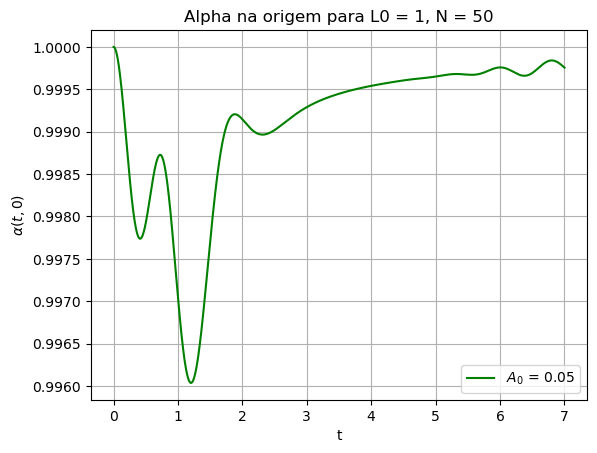

In [257]:
# Searching for critical amplitude:

#Alpha_origin_disp = Alpha_origin
#Alpha_origin_collapse = Alpha_origin

plt.plot(t1, Alpha_origin, color = "g", label = "$A_0$ = {:}".format(A0))
plt.title("Alpha na origem para L0 = 1, N = {:}".format(N))
plt.ylabel(r"$\alpha(t,0)$")
plt.xlabel("t")
plt.grid()
plt.legend()

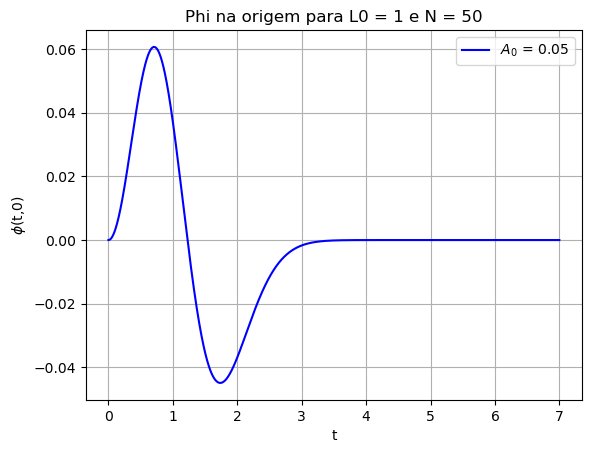

In [258]:
plt.plot(t1, phi_origin, color = "b", label = "$A_0$ = {:}".format(A0))
plt.title("Phi na origem para L0 = 1 e N = {:}".format(N) )
plt.ylabel("$\phi$(t,0)")
plt.xlabel("t")  
#plt.xlim(7.2,8.2)
plt.grid()
plt.legend() 

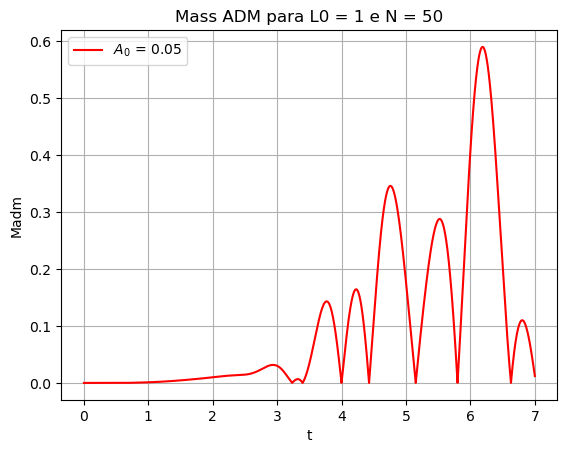

In [263]:
# Mass ADM error

Madm_error = abs(Madm - M0)/M0 * 100

plt.plot(t1, Madm_error, color = "r", label = "$A_0$ = {:}".format(A0))
plt.title("Mass ADM para L0 = 1 e N = {:}".format(N) )
plt.ylabel("Madm")
plt.xlabel("t")  
#plt.yscale('log')
#plt.xlim(7.2,8.2)
plt.grid()
plt.legend() 

In [260]:
# Code convergency:

# N = 50

L2HC_50_L02 = max(L2HC)
Madm_50_L02 = max(Madm_error)

#L2HC_50_L05 = max(L2HC)
#Madm_50_L05 = max(Madm_error)

#L2HC_50_L010 = max(L2HC)
#Madm_50_L010 = max(Madm_error)

In [164]:
# N = 100

L2HC_100_L02 = 
L2HC_100_L05 = 3471774.7108112522
L2HC_100_L010 = 216871.3054398927

Madm_100_L01 = 0.005712611232043864
Madm_100_L02 = 0.0022423791993227762
Madm_100_L03 = 0.0019007703638794643

In [ ]:
# 150

L2HC_150_L02 = 1515713621.1581268
L2HC_150_L05 = 38791845.93498482
L2HC_150_L010 = 2426321.450499789

Madm_150_L02 = 3.0380857499096754
Madm_150_L05 = 3.0380857499096754
Madm_150_L010 = 4.587658379535796e-05

In [ ]:
# 200

L2HC_200_L02 = 8431506185.593504
L2HC_200_L05 = 215870568.7504239
L2HC_200_L010 = 13481480.819082735



In [183]:
# 250



135723009.6418674

Text(0.5, 1.0, 'log(L2Hc) para $N = 100$, $L_0 = 2$')

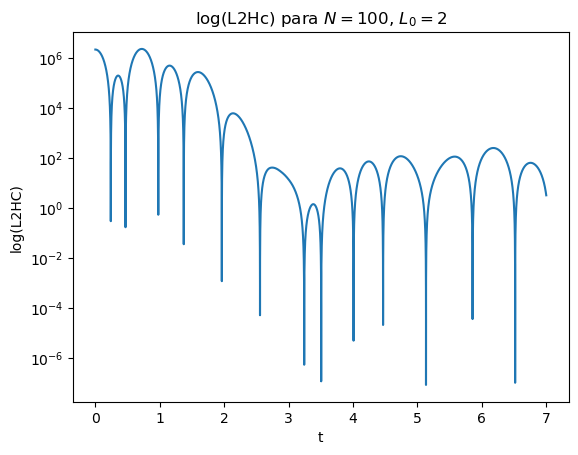

In [261]:
# Erro L2 of Hamiltonian constraint

plt.plot(t1,L2HC,label = "$A_0$ = {:}".format(A0))
plt.yscale("log")
plt.ylabel("log(L2HC)")
plt.xlabel("t")
plt.grid
plt.title("log(L2Hc) para $N = 50$, $L_0 = 2$")

NameError: name 'fig' is not defined

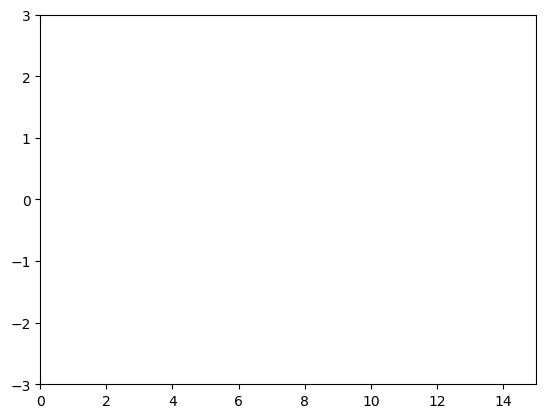

In [23]:
# Animation plot for Phi: Scalar Field
        
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

#fig = plt.figure()
ax = plt.axes(xlim=(0, 15),ylim = (-3, 3))
line, = ax.plot([], [], lw=2)
initA0_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
x = rplot

def init():
    line.set_data([], [])
    initA0_text.set_text('')
    return line,

def animate(i):
  y = phi_set[i]
  line.set_data(x, y)
  initA0_text.set_text("$A_0 = {:}$".format(A0))
  return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=It, interval=0.2, blit=True)

HTML(anim.to_html5_video())

In [ ]:



#L2HC_L01 = [L2HC_50_L01, L2HC_100_L01,L2HC_150_L01, L2HC_200_L01,L2HC_250_L01]



#L2HC_L02 = [L2HC_50_L02, L2HC_100_L02, L2HC_150_L02, L2HC_200_L02, L2HC_250_L02]



#L2HC_L03 = [L2HC_50_L03, L2HC_100_L03, L2HC_150_L03, L2HC_200_L03, L2HC_250_L03]

#N = [30,60,90,120,150,180,210]

#N_max = 250

#plt.plot(N, L2HC_L02, '-b^', label = "L0 = 2")
#plt.plot(N, L2HC_L04, '-rs',label = "L0 = 4")
#plt.plot(N, L2HC_L06, '-ko',label = "L0 = 6")
#plt.xticks(range(N_max), N)
#plt.xlabel('N')
#plt.ylabel('
#')
#plt.yscale('log')
#plt.legend()
#plt.show()